# Data dictionary

## [Link to dataset](https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data)

<style type="text/css">
.tg {
  border-collapse: collapse;
  border-spacing: 0;
  width: 100%; /* Make the table full width */
  background-color: #2e2e2e; /* Dark background color */
  color: white; /* White text color */
}

.tg td,
.tg th {
  border-color: #444; /* Darker border color */
  border-style: solid;
  border-width: 1px;
  font-family: Arial, sans-serif;
  font-size: 14px;
  overflow: hidden;
  padding: 10px 5px;
  word-break: normal;
  text-align: left; /* Align text to the left */
  vertical-align: top; /* Align content to the top */
}

.tg th {
  font-weight: normal; /* Remove bold for headers as in the image */
  background-color: #3a3a3a; /* Slightly lighter dark for header */
}

.tg .tg-za14 {
  border-color: inherit;
  text-align: left;
  vertical-align: middle; /* Center vertically for cleaner look */
  padding-left: 15px; /* Add some padding on the left for variable names */
}
</style>
<table class="tg">
  <thead>
    <tr>
      <th class="tg-za14">Variable Name</th>
      <th class="tg-za14">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td class="tg-za14">CRIM</td>
      <td class="tg-za14">Per capita crime rate by town</td>
    </tr>
    <tr>
      <td class="tg-za14">ZN</td>
      <td class="tg-za14">Proportion of residential land zoned for lots over 25,000 sq.ft.</td>
    </tr>
    <tr>
      <td class="tg-za14">INDUS</td>
      <td class="tg-za14">Proportion of non-retail business acres per town</td>
    </tr>
    <tr>
      <td class="tg-za14">CHAS</td>
      <td class="tg-za14">Charles River dummy variable (1 if tract bounds river; 0 otherwise)</td>
    </tr>
    <tr>
      <td class="tg-za14">NOX</td>
      <td class="tg-za14">Nitric oxides concentration (parts per 10 million)</td>
    </tr>
    <tr>
      <td class="tg-za14">RM</td>
      <td class="tg-za14">Average number of rooms per dwelling</td>
    </tr>
    <tr>
      <td class="tg-za14">AGE</td>
      <td class="tg-za14">Proportion of owner-occupied units built prior to 1940</td>
    </tr>
    <tr>
      <td class="tg-za14">TAX</td>
      <td class="tg-za14">Full-value property tax rate per $10,000</td>
    </tr>
    <tr>
      <td class="tg-za14">DIS</td>
      <td class="tg-za14">Weighted distances to five Boston employment centres</td>
    </tr>
    <tr>
      <td class="tg-za14">RAD</td>
      <td class="tg-za14">Index of accessibility to radial highways</td>

# Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/HousingData.csv


In [2]:
# --- Core Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scikit-learn: Preprocessing ---
from sklearn.preprocessing import RobustScaler, StandardScaler

# --- Scikit-learn: Models ---
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lars,
    LarsCV,
    Lasso,
    LassoCV,
    LassoLars,
    LassoLarsCV,
    LassoLarsIC
)

# --- Scikit-learn: Model Selection and Metrics ---
from sklearn.model_selection import (
    train_test_split,
    KFold,
    cross_val_score,
    GridSearchCV # For standard grid search if needed, though BayesSearchCV is used
)
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error
)

# --- Scikit-optimize (skopt) ---
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# --- Other Utilities ---
import warnings
# Suppress warnings for cleaner output (combining your multiple warning filters)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore") # Catches other general warnings
!pip install --upgrade scipy # This is a shell command for installation, not an import.
                               # Run this separately if you need to upgrade scipy.

# --- Optional/Less Common Imports from Original ---
from sklearn.datasets import make_regression # Useful for creating dummy regression datasets
from sklearn import linear_model # This is redundant if you import specific models from sklearn.linear_model
import pylab as pl # Often imported with matplotlib, but plt is more commonly used directly.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.0 which is incompatible.
ydata-profiling 4.16.1 requires scipy<1.16,>=1.4.1, but you have scipy 1.16.0 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requir

## Ridge coefficients as a function of the regularization

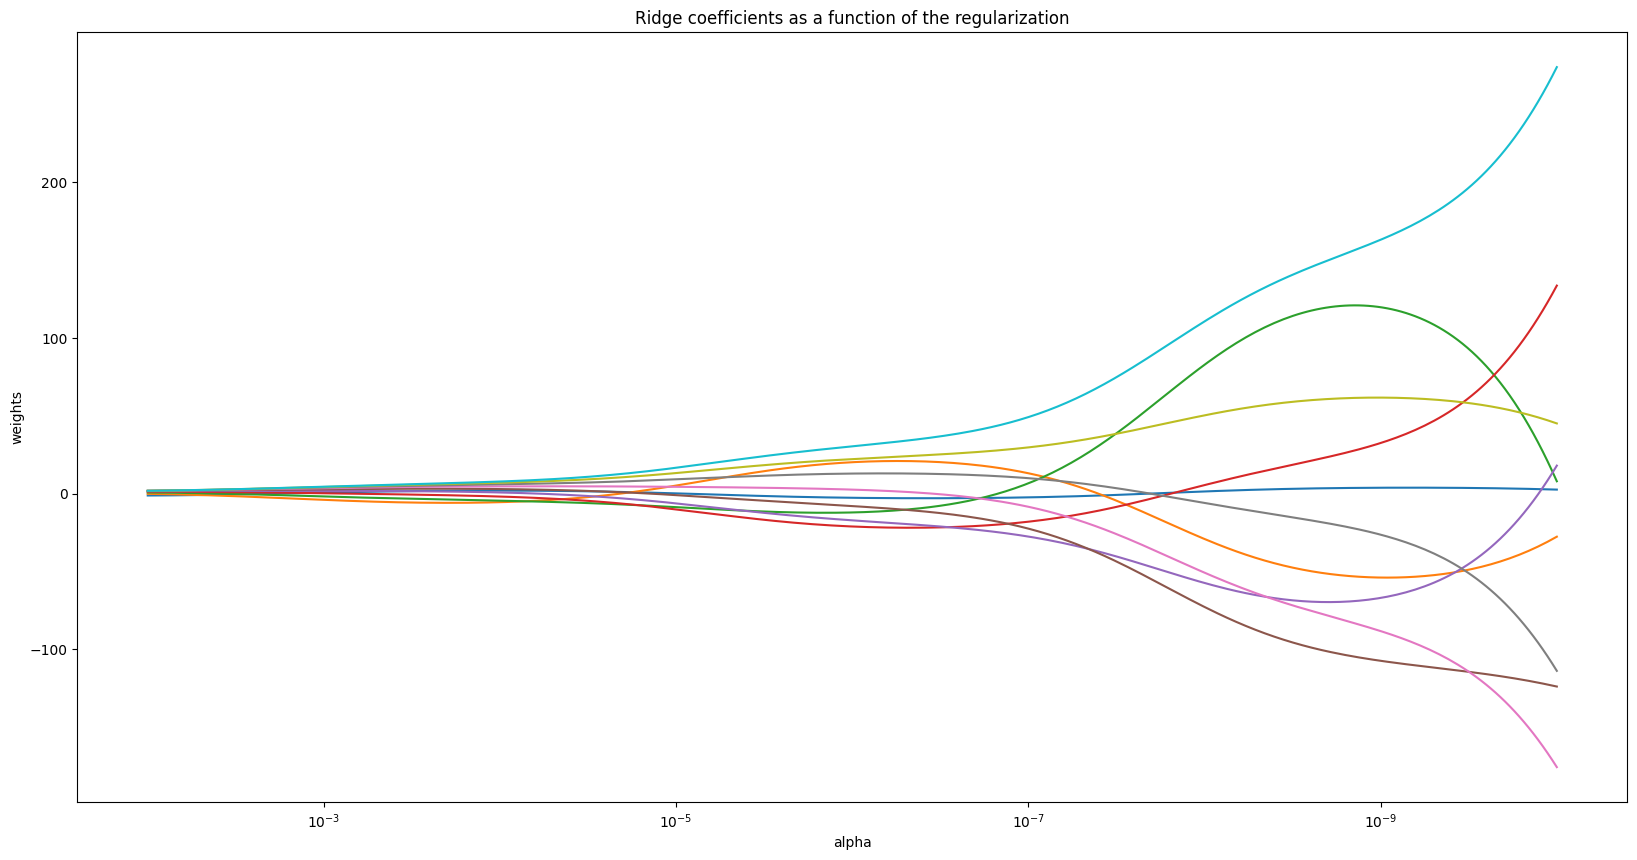

In [3]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# Define the range of alpha values
n_alphas = 300
alphas = np.logspace(-10, -2, n_alphas)

# Store coefficients for each alpha
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)  # Use X and y, not x_train_scaled and y_train
    coefs.append(ridge.coef_)

# Convert coefficients to a numpy array for plotting
coefs = np.array(coefs)

# Plot the coefficients
plt.figure(figsize=(20, 10))
ax = plt.gca()

# Plot each feature's coefficient as a separate line
for i in range(coefs.shape[1]):
    ax.plot(alphas, coefs[:, i])

ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # Reverse the x-axis to match the plot
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

[Credit : scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)

## Ordinary Least Squares and Ridge Regression Variance

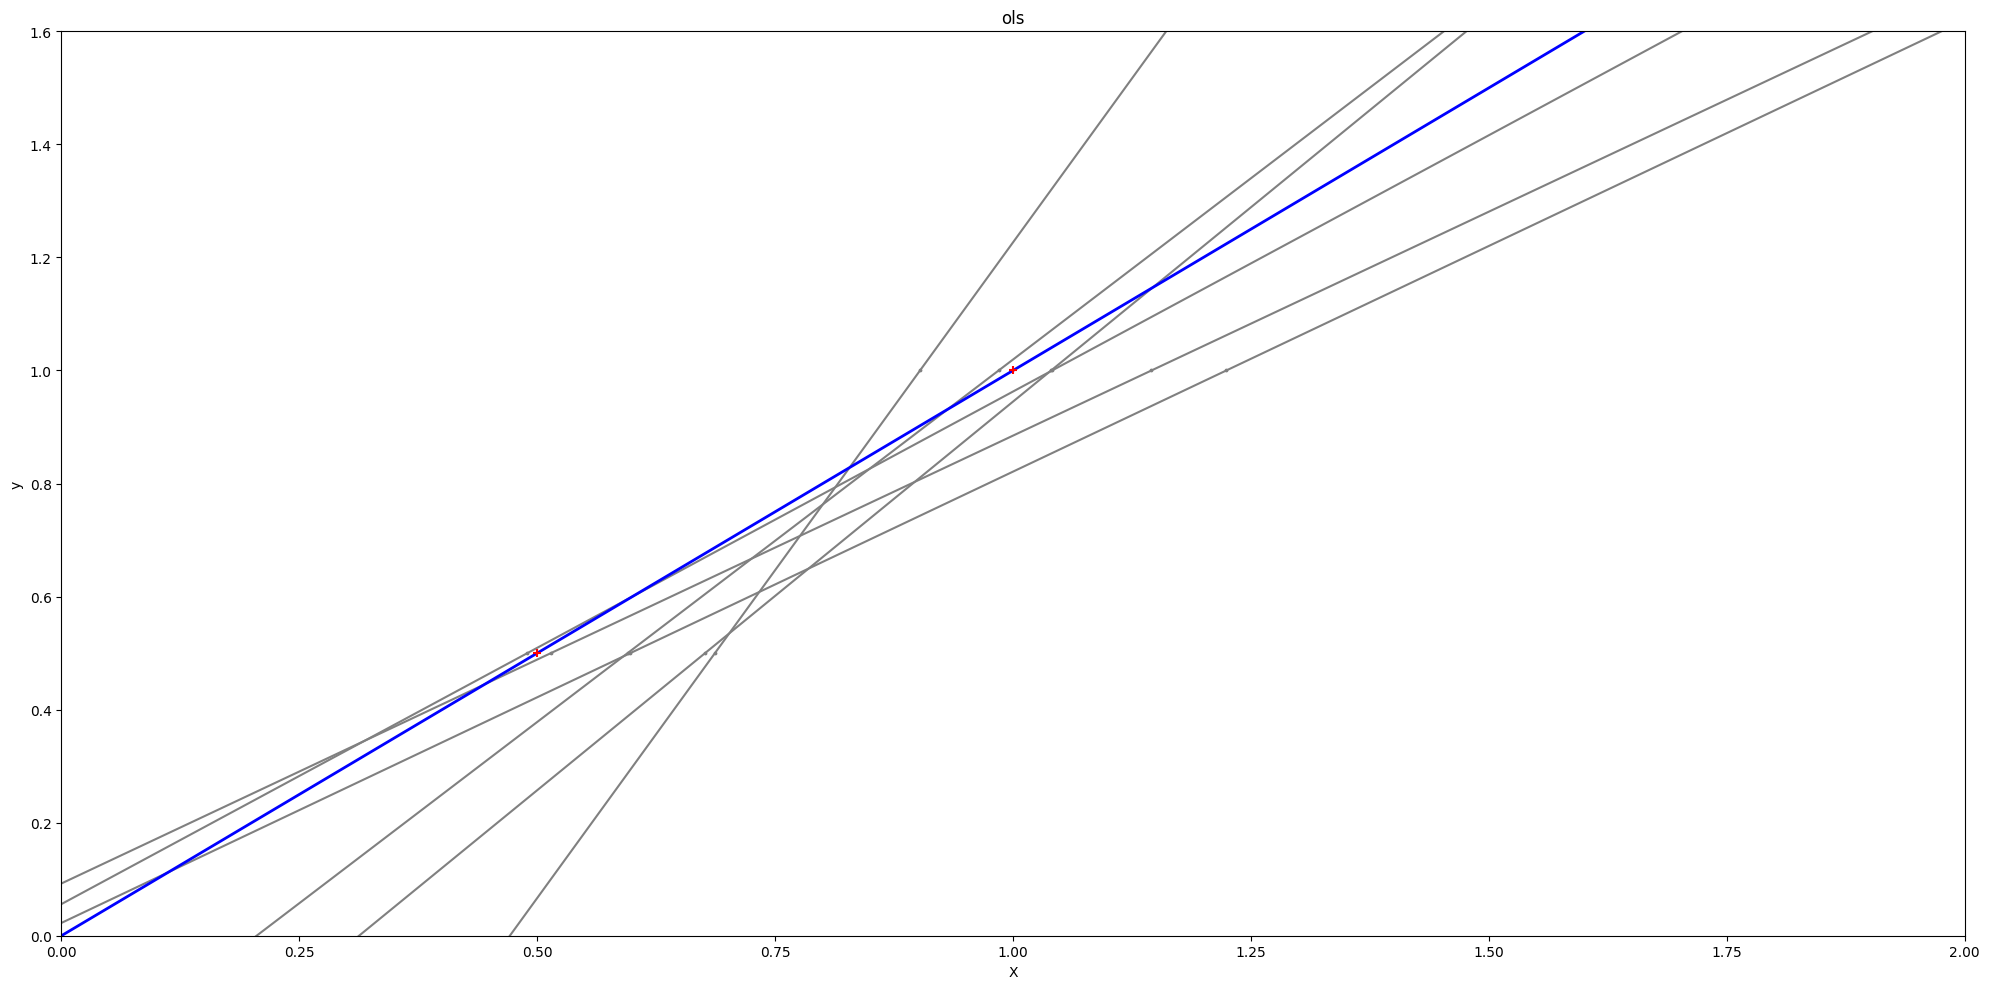

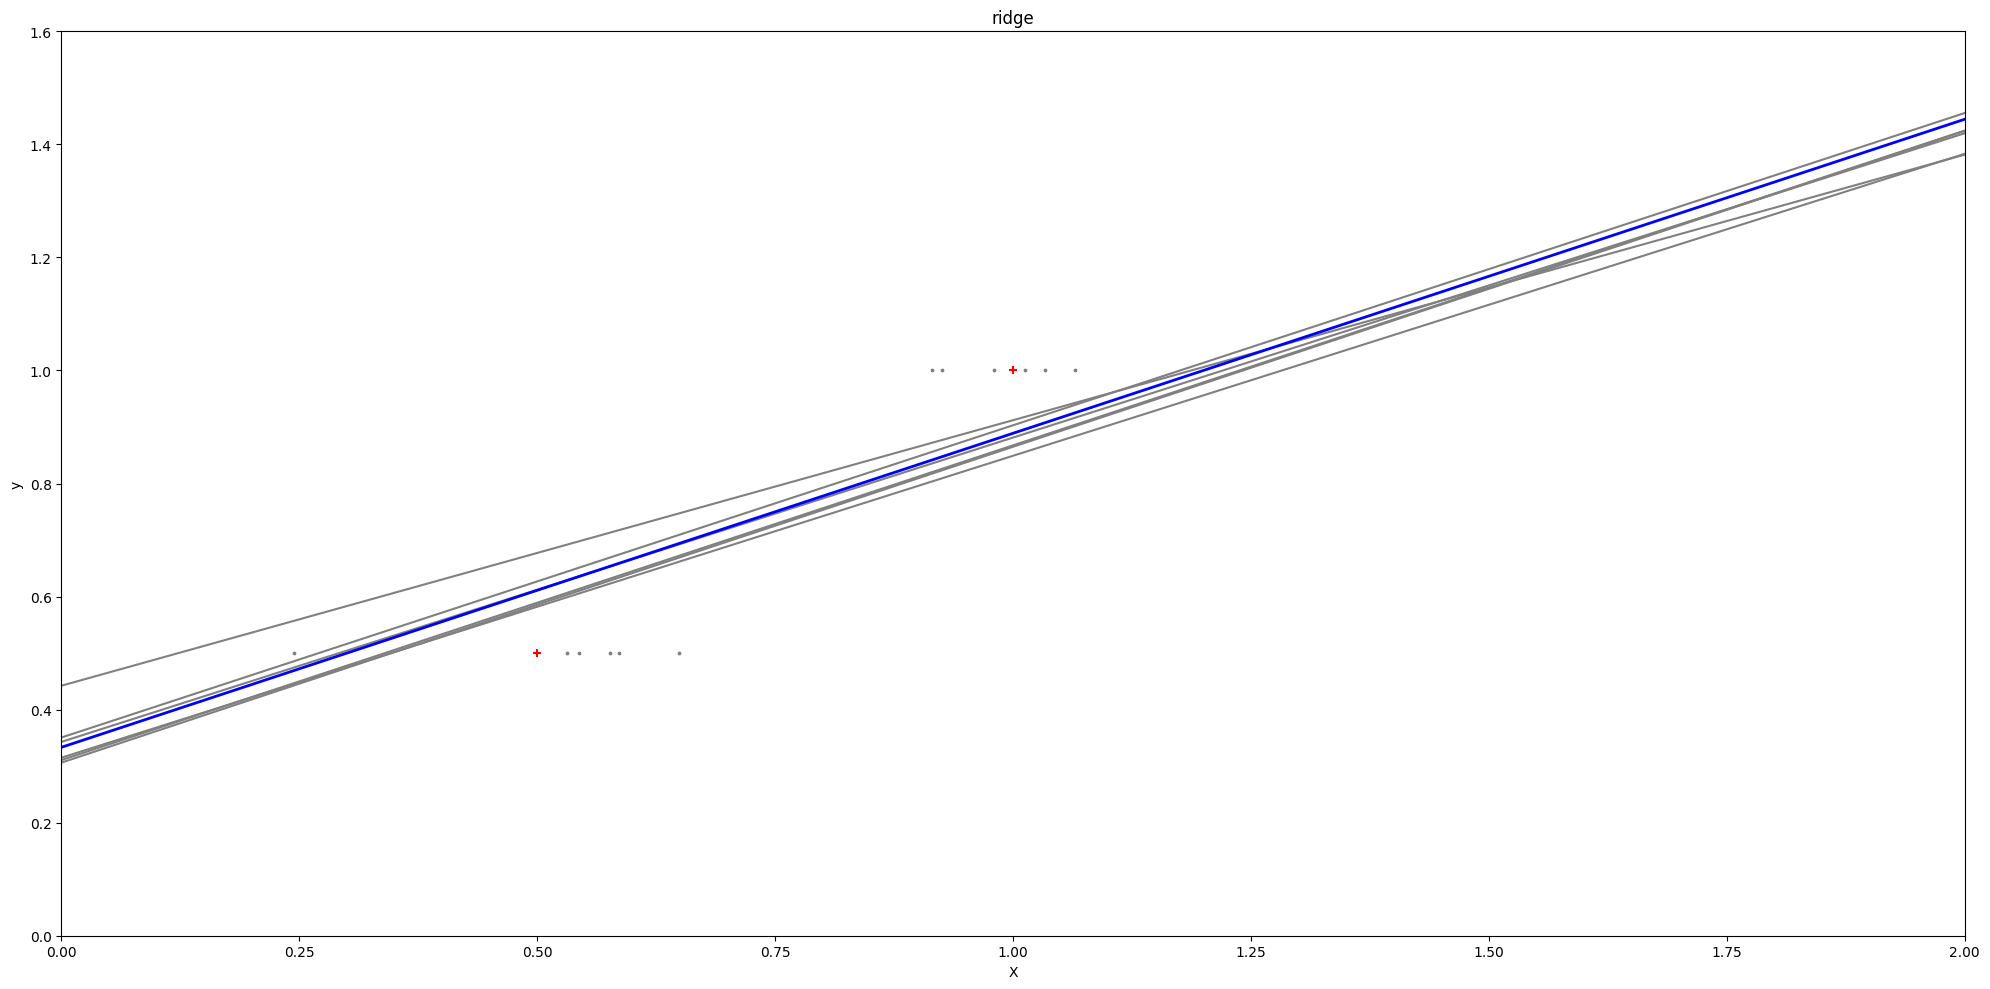

In [4]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause
X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(20, 10))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

[Credit : scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py)

## Ridge coefficients as a function of the L2 Regularization

### Creating a non-noisy data set

In [5]:
X, y, w = make_regression(
    n_samples=100, n_features=10, n_informative=8, coef=True, random_state=1
)

# Obtain the true coefficients
print(f"The true coefficient of this regression problem are:\n{w}")

The true coefficient of this regression problem are:
[38.32634568 88.49665188  0.         29.75747153  0.         19.08699432
 25.44381023 38.69892343 49.28808734 71.75949622]


### Training the Ridge Regressor

In [6]:
clf = Ridge()

# Generate values for `alpha` that are evenly distributed on a logarithmic scale
alphas = np.logspace(-3, 4, 200)
coefs = []
errors_coefs = []

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a).fit(X, y)
    coefs.append(clf.coef_)
    errors_coefs.append(mean_squared_error(clf.coef_, w))

### Plotting trained Coefficients and Mean Squared Errors

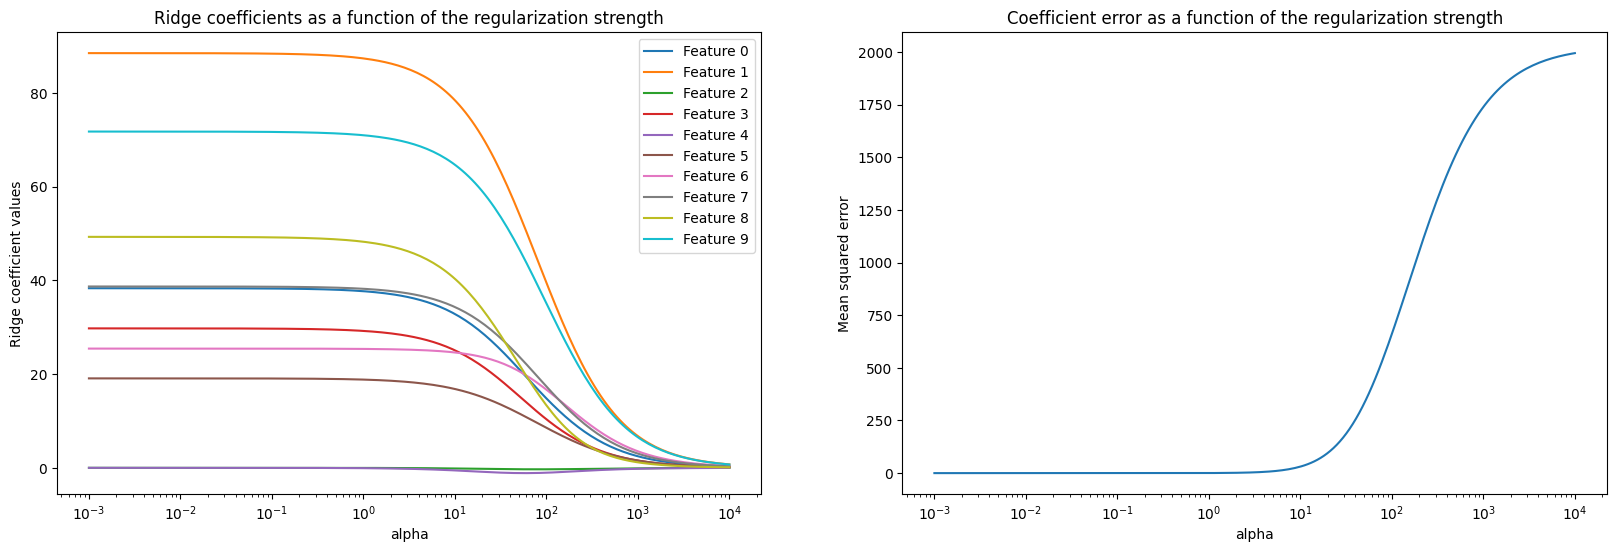

In [7]:
alphas = pd.Index(alphas, name="alpha")
coefs = pd.DataFrame(coefs, index=alphas, columns=[f"Feature {i}" for i in range(10)])
errors = pd.Series(errors_coefs, index=alphas, name="Mean squared error")

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

coefs.plot(
    ax=axs[0],
    logx=True,
    title="Ridge coefficients as a function of the regularization strength",
)
axs[0].set_ylabel("Ridge coefficient values")
errors.plot(
    ax=axs[1],
    logx=True,
    title="Coefficient error as a function of the regularization strength",
)
_ = axs[1].set_ylabel("Mean squared error")

[Credit : scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html#sphx-glr-auto-examples-linear-model-plot-ridge-coeffs-py)

# Load dataset

In [8]:
df=pd.read_csv("/kaggle/input/boston-housing-dataset/HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Split dataset

In [9]:
x = df.drop('MEDV', axis=1) 
y = df['MEDV'] 

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
y_train shape: (404,)
X_test shape: (102, 13)
y_test shape: (102,)


# EDA

## Basic Statistics

In [10]:
display(x_train.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,NaN,6.06,0.0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,NaN,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28


In [11]:
display(x_train.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,386.000000,387.000000,386.000000,388.000000,404.000000,404.000000,388.000000,404.000000,404.000000,404.000000,404.000000,404.000000,389.000000
mean,3.601731,11.506460,10.879482,0.072165,0.556484,6.315891,68.355412,3.808195,9.356436,404.032178,18.318317,356.278342,12.479640
std,9.012465,23.415526,6.859694,0.259095,0.117704,0.709452,27.830877,2.131226,8.589721,166.172655,2.228701,91.566533,7.098089
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.080573,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.870000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,76.950000,3.175750,5.000000,330.000000,18.700000,391.305000,10.970000
75%,2.808720,15.000000,18.100000,0.000000,0.631000,6.636750,93.325000,5.400800,12.000000,666.000000,20.200000,395.755000,16.300000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
display(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     386 non-null    float64
 1   ZN       387 non-null    float64
 2   INDUS    386 non-null    float64
 3   CHAS     388 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      388 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    389 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 44.2 KB


None

## Check missing values

In [13]:
columns_with_missing = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# Impute missing values in x_train
print("Missing values before imputation in x_train:")
print(x_train[columns_with_missing].isnull().sum())

for col in columns_with_missing:
    if col in x_train.columns:
        mean_value_train = x_train[col].mean()
        x_train[col] = x_train[col].fillna(mean_value_train)  # Direct assignment

print("\nMissing values after imputation in x_train:")
print(x_train[columns_with_missing].isnull().sum())

# Impute missing values in x_test
print("\nMissing values before imputation in x_test:")
print(x_test[columns_with_missing].isnull().sum())

for col in columns_with_missing:
    if col in x_test.columns:
        mean_value_test = x_test[col].mean()
        x_test[col] = x_test[col].fillna(mean_value_test)  # Direct assignment

print("\nMissing values after imputation in x_test:")
print(x_test[columns_with_missing].isnull().sum())

Missing values before imputation in x_train:
CRIM     18
ZN       17
INDUS    18
CHAS     16
AGE      16
LSTAT    15
dtype: int64

Missing values after imputation in x_train:
CRIM     0
ZN       0
INDUS    0
CHAS     0
AGE      0
LSTAT    0
dtype: int64

Missing values before imputation in x_test:
CRIM     2
ZN       3
INDUS    2
CHAS     4
AGE      4
LSTAT    5
dtype: int64

Missing values after imputation in x_test:
CRIM     0
ZN       0
INDUS    0
CHAS     0
AGE      0
LSTAT    0
dtype: int64


In [14]:
# Assuming x_train is your DataFrame
x_train_sorted = x_train.sort_index()
# If y_train is a Series with the same index:
y_train_sorted = y_train.sort_index()
# Assuming x_train is your DataFrame
x_test_sorted = x_test.sort_index()
# If y_train is a Series with the same index:
y_test_sorted = y_test.sort_index()

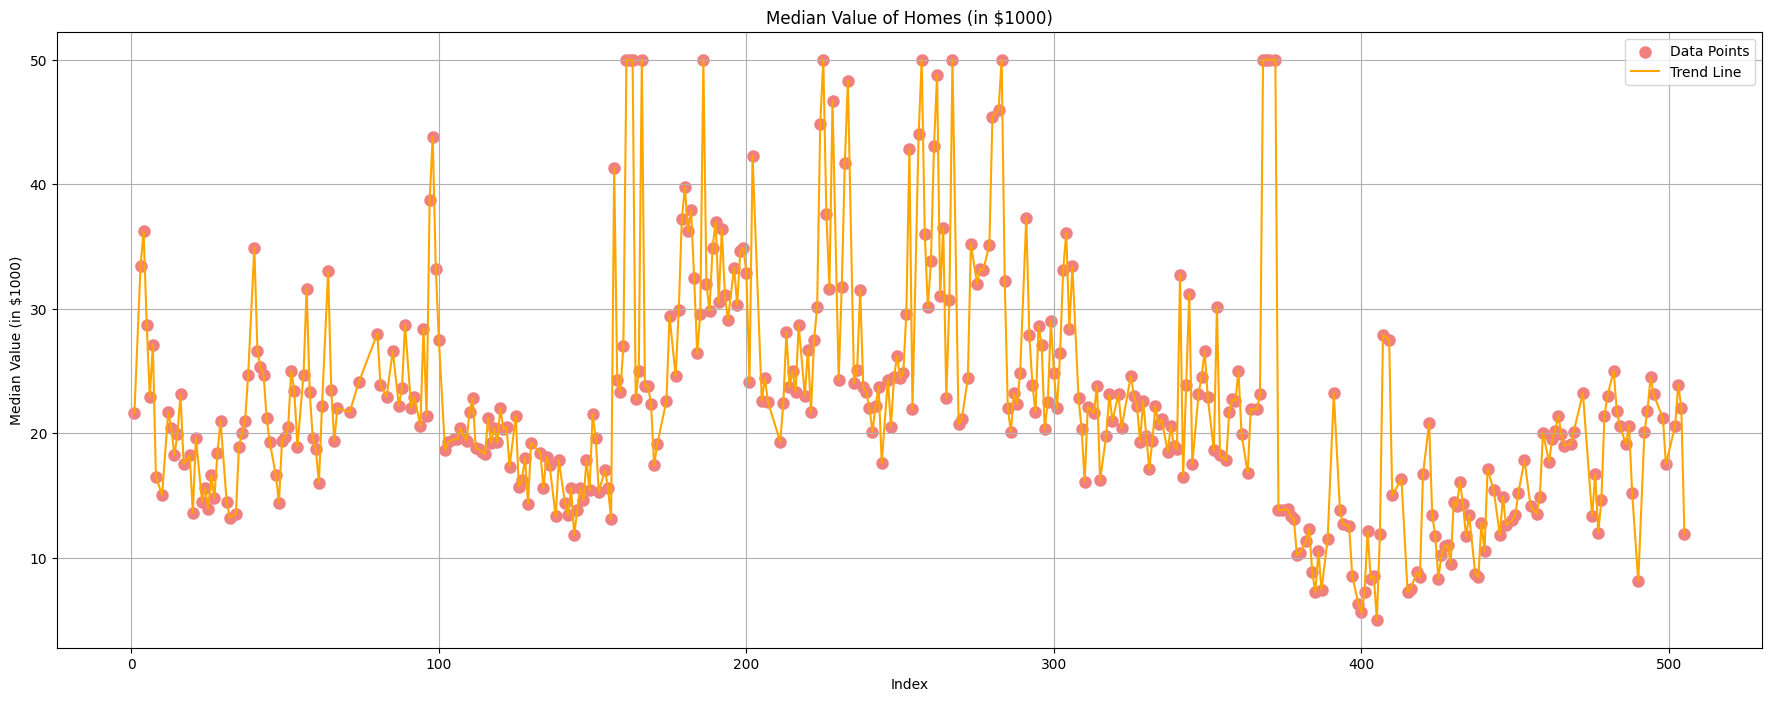

In [15]:
# If y_train is a NumPy array, convert it to a Pandas Series for easier plotting
if isinstance(y_train_sorted, np.ndarray):
    y_train_sorted = pd.Series(y_train_sorted, name="MEDV")

# If y_train is already a Pandas Series, ensure it has a name for the label
if not y_train.name:
    y_train_sorted.name = "MEDV"

# Create the plot
plt.figure(figsize=(22, 8))

# Scatter plot for the data points (red dots)
plt.scatter(x_train_sorted.index, y_train_sorted, color="lightcoral", lw=3, label="Data Points")

# Line plot connecting the data points (cyan line)
plt.plot(x_train_sorted.index, y_train_sorted, color="orange", label="Trend Line")

# Add title, labels, and grid
plt.title("Median Value of Homes (in $1000)")
plt.xlabel("Index")
plt.ylabel("Median Value (in $1000)")
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()

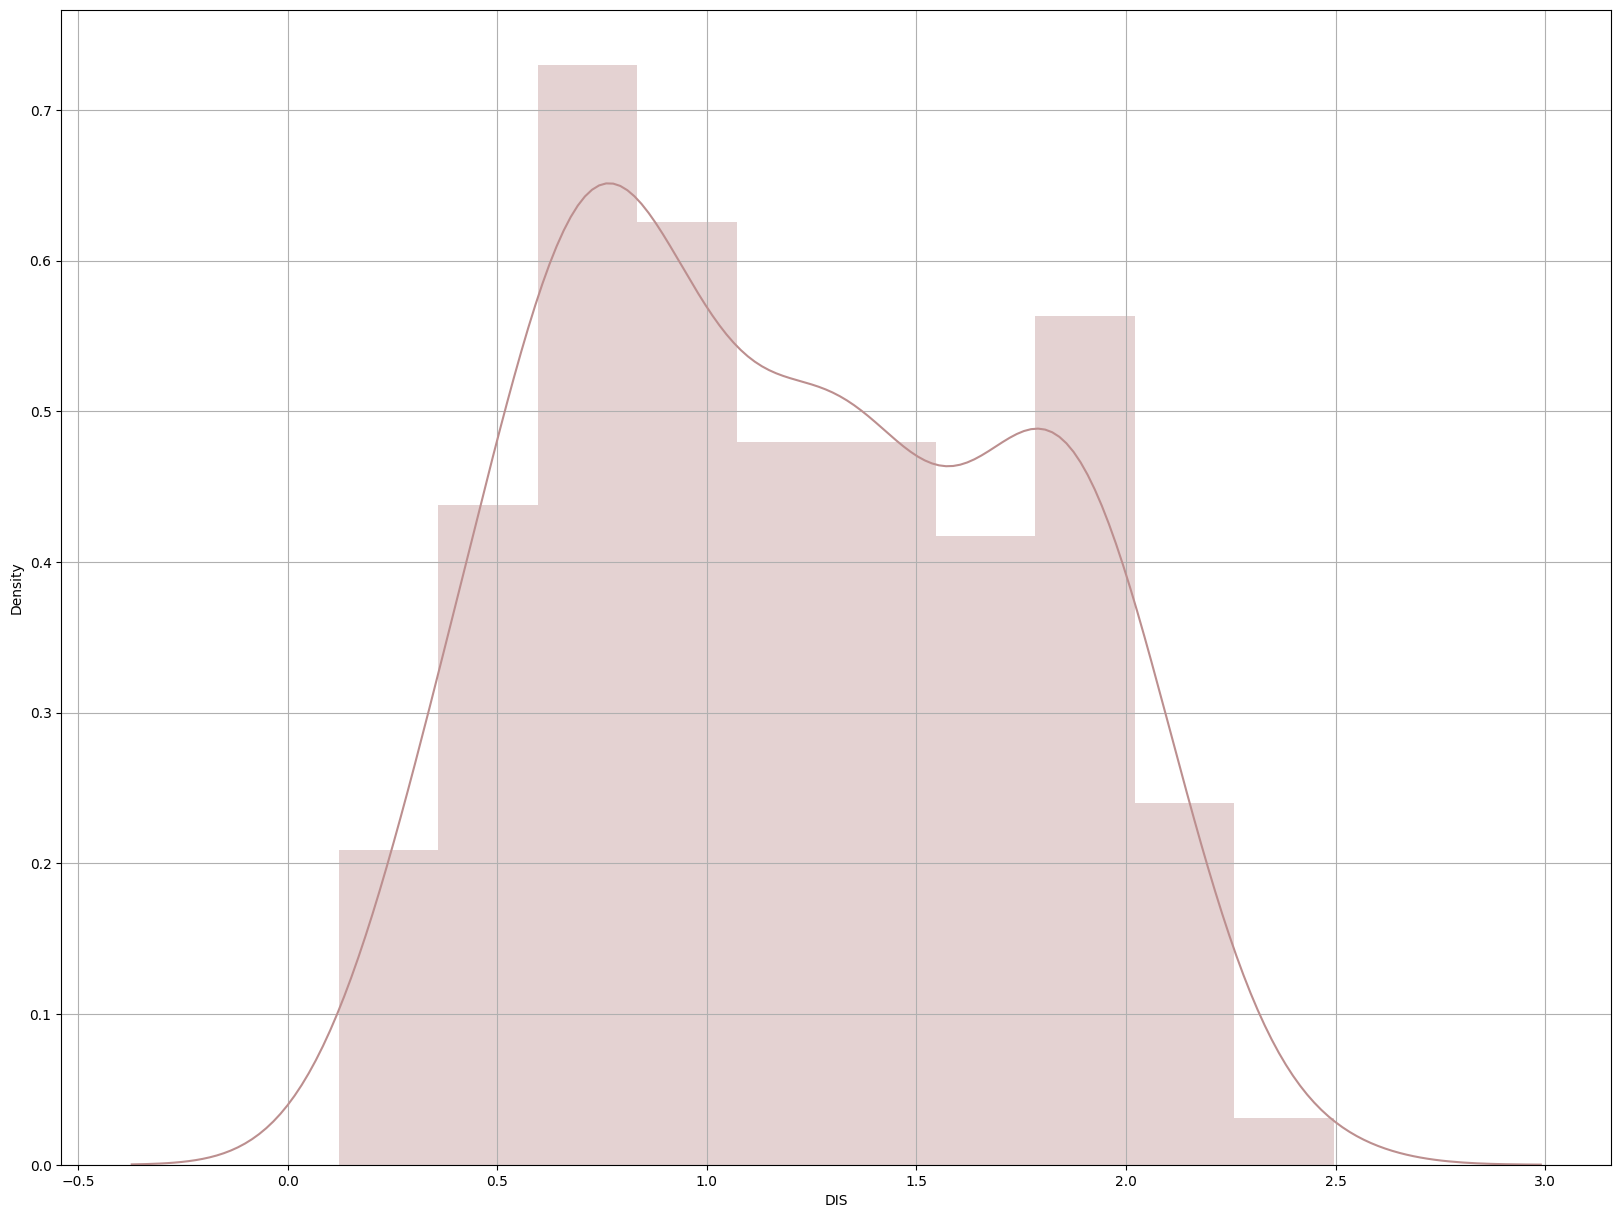

In [16]:
def log_transform(col):
    return np.log(col[0])

x_train_sorted["DIS"]=x_train_sorted[["DIS"]].apply(log_transform, axis=1)
#Plot
plt.figure(figsize=(20, 15))
sns.distplot(x_train_sorted["DIS"], color = 'rosybrown')
plt.grid(True)
plt.show()

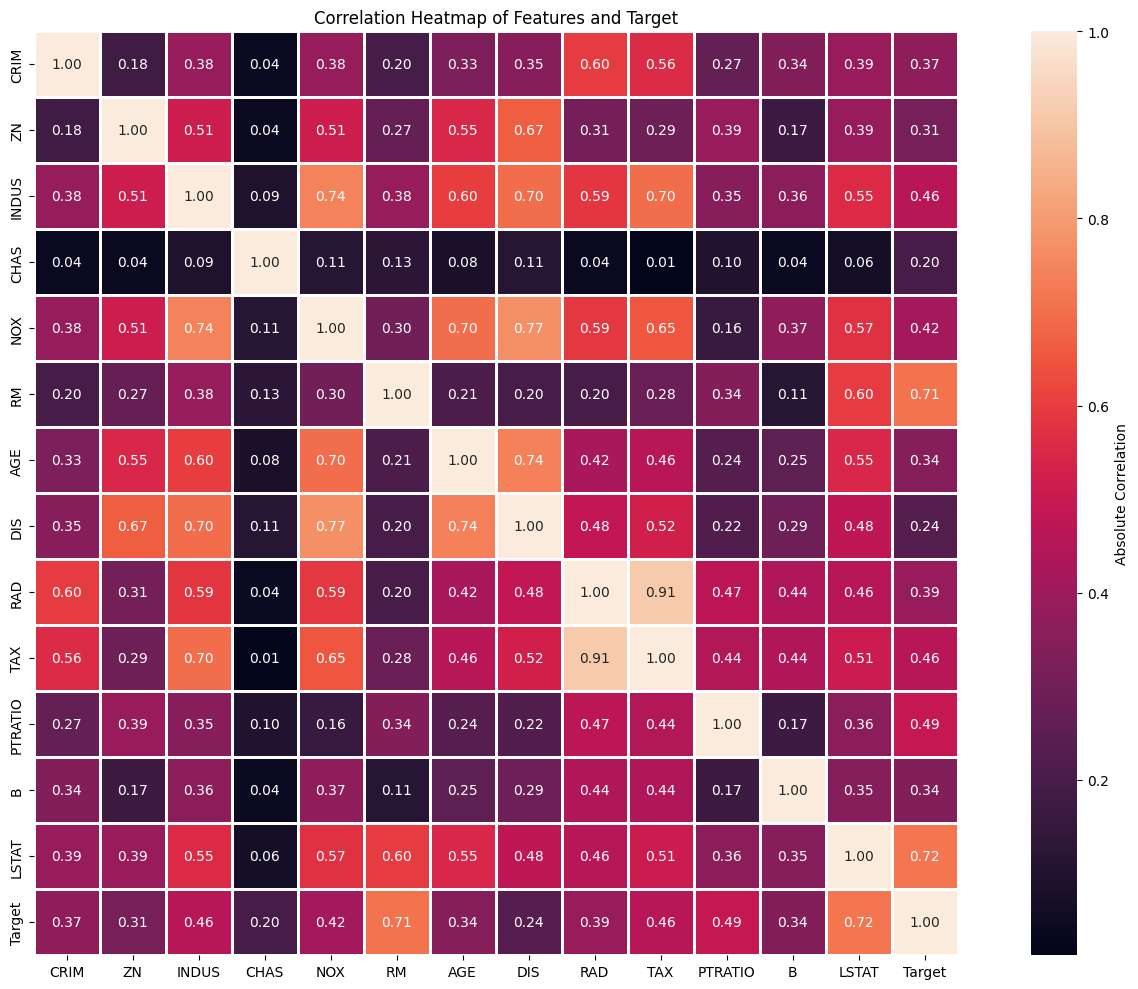

In [17]:
# Ensure x_train is a DataFrame and y_train is a Series with a name
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name='Target')

# Combine x_train and y_train into a single DataFrame
combined_data = x_train.copy()
combined_data['Target'] = y_train

# Compute the absolute correlation matrix
corr = combined_data.corr().abs()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, linewidth=1, cmap="rocket", fmt=".2f", square=True, cbar_kws={'label': 'Absolute Correlation'})
plt.title("Correlation Heatmap of Features and Target")
plt.tight_layout()
plt.show()

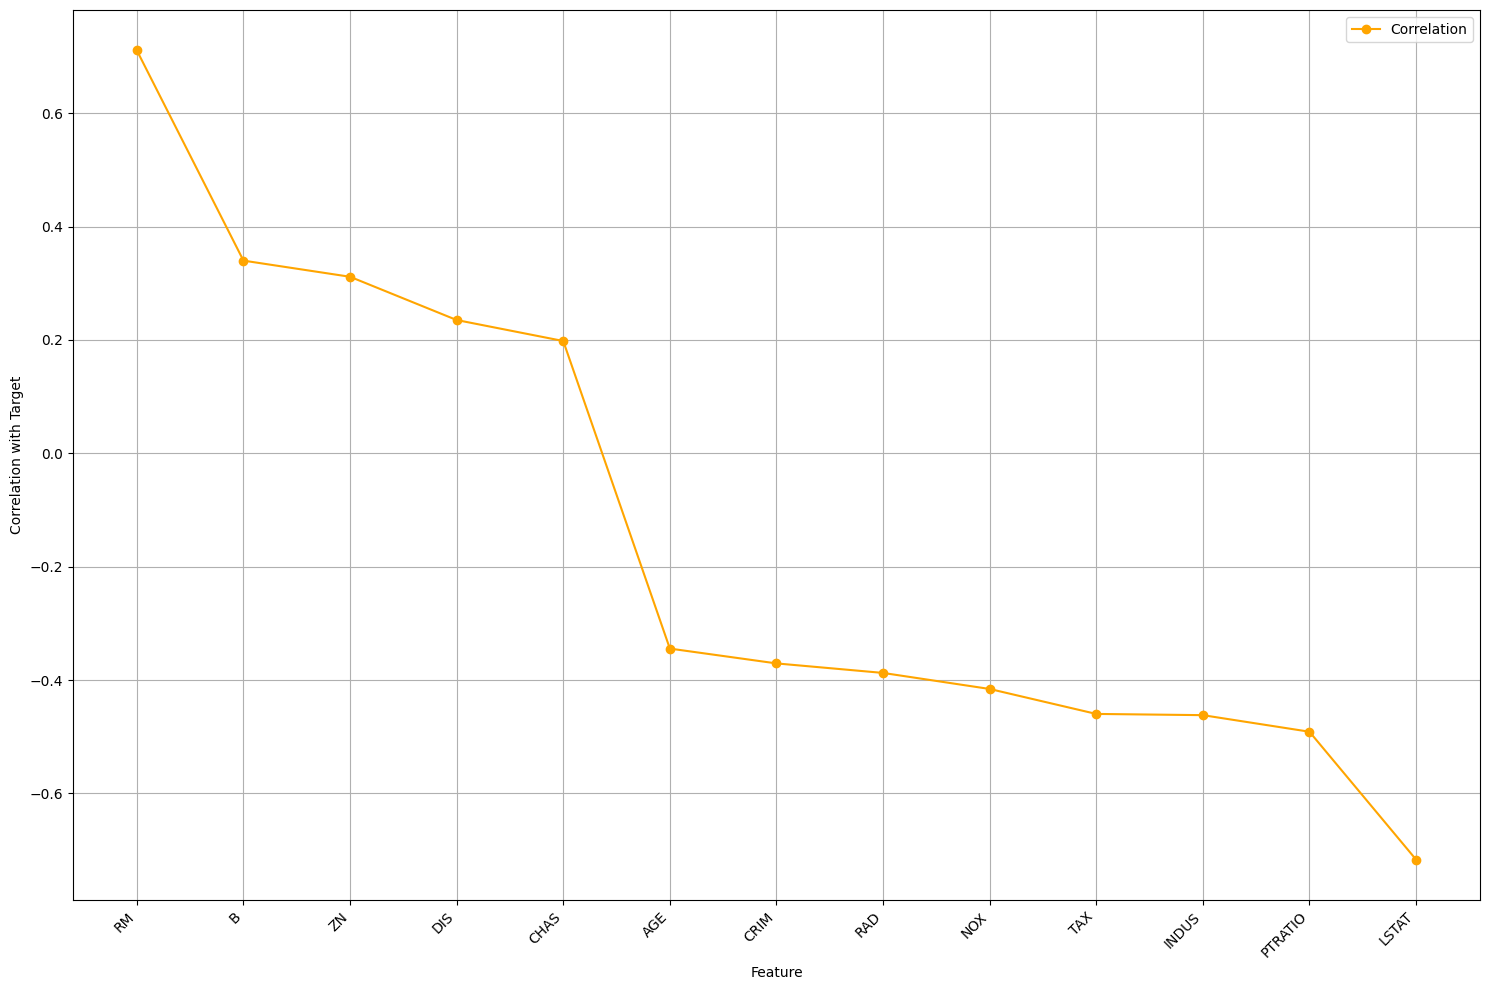

In [18]:
# Ensure x_train is a DataFrame and y_train is a Series
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name='Target')

# Combine x_train and y_train into a single DataFrame
combined_data = x_train.copy()
combined_data['Target'] = y_train

# Compute the correlation matrix and extract correlations with the target
corr_with_target = combined_data.corr()['Target'].drop('Target')  # Drop the Target-Target correlation

# Sort the correlations in descending order
corr_sorted = corr_with_target.sort_values(ascending=False)

# Create the line plot
plt.figure(figsize=(15, 10))
plt.plot(corr_sorted.index, corr_sorted.values, label="Correlation", color="orange", marker='o')

# Add labels, legend, grid, and layout
plt.ylabel("Correlation with Target")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

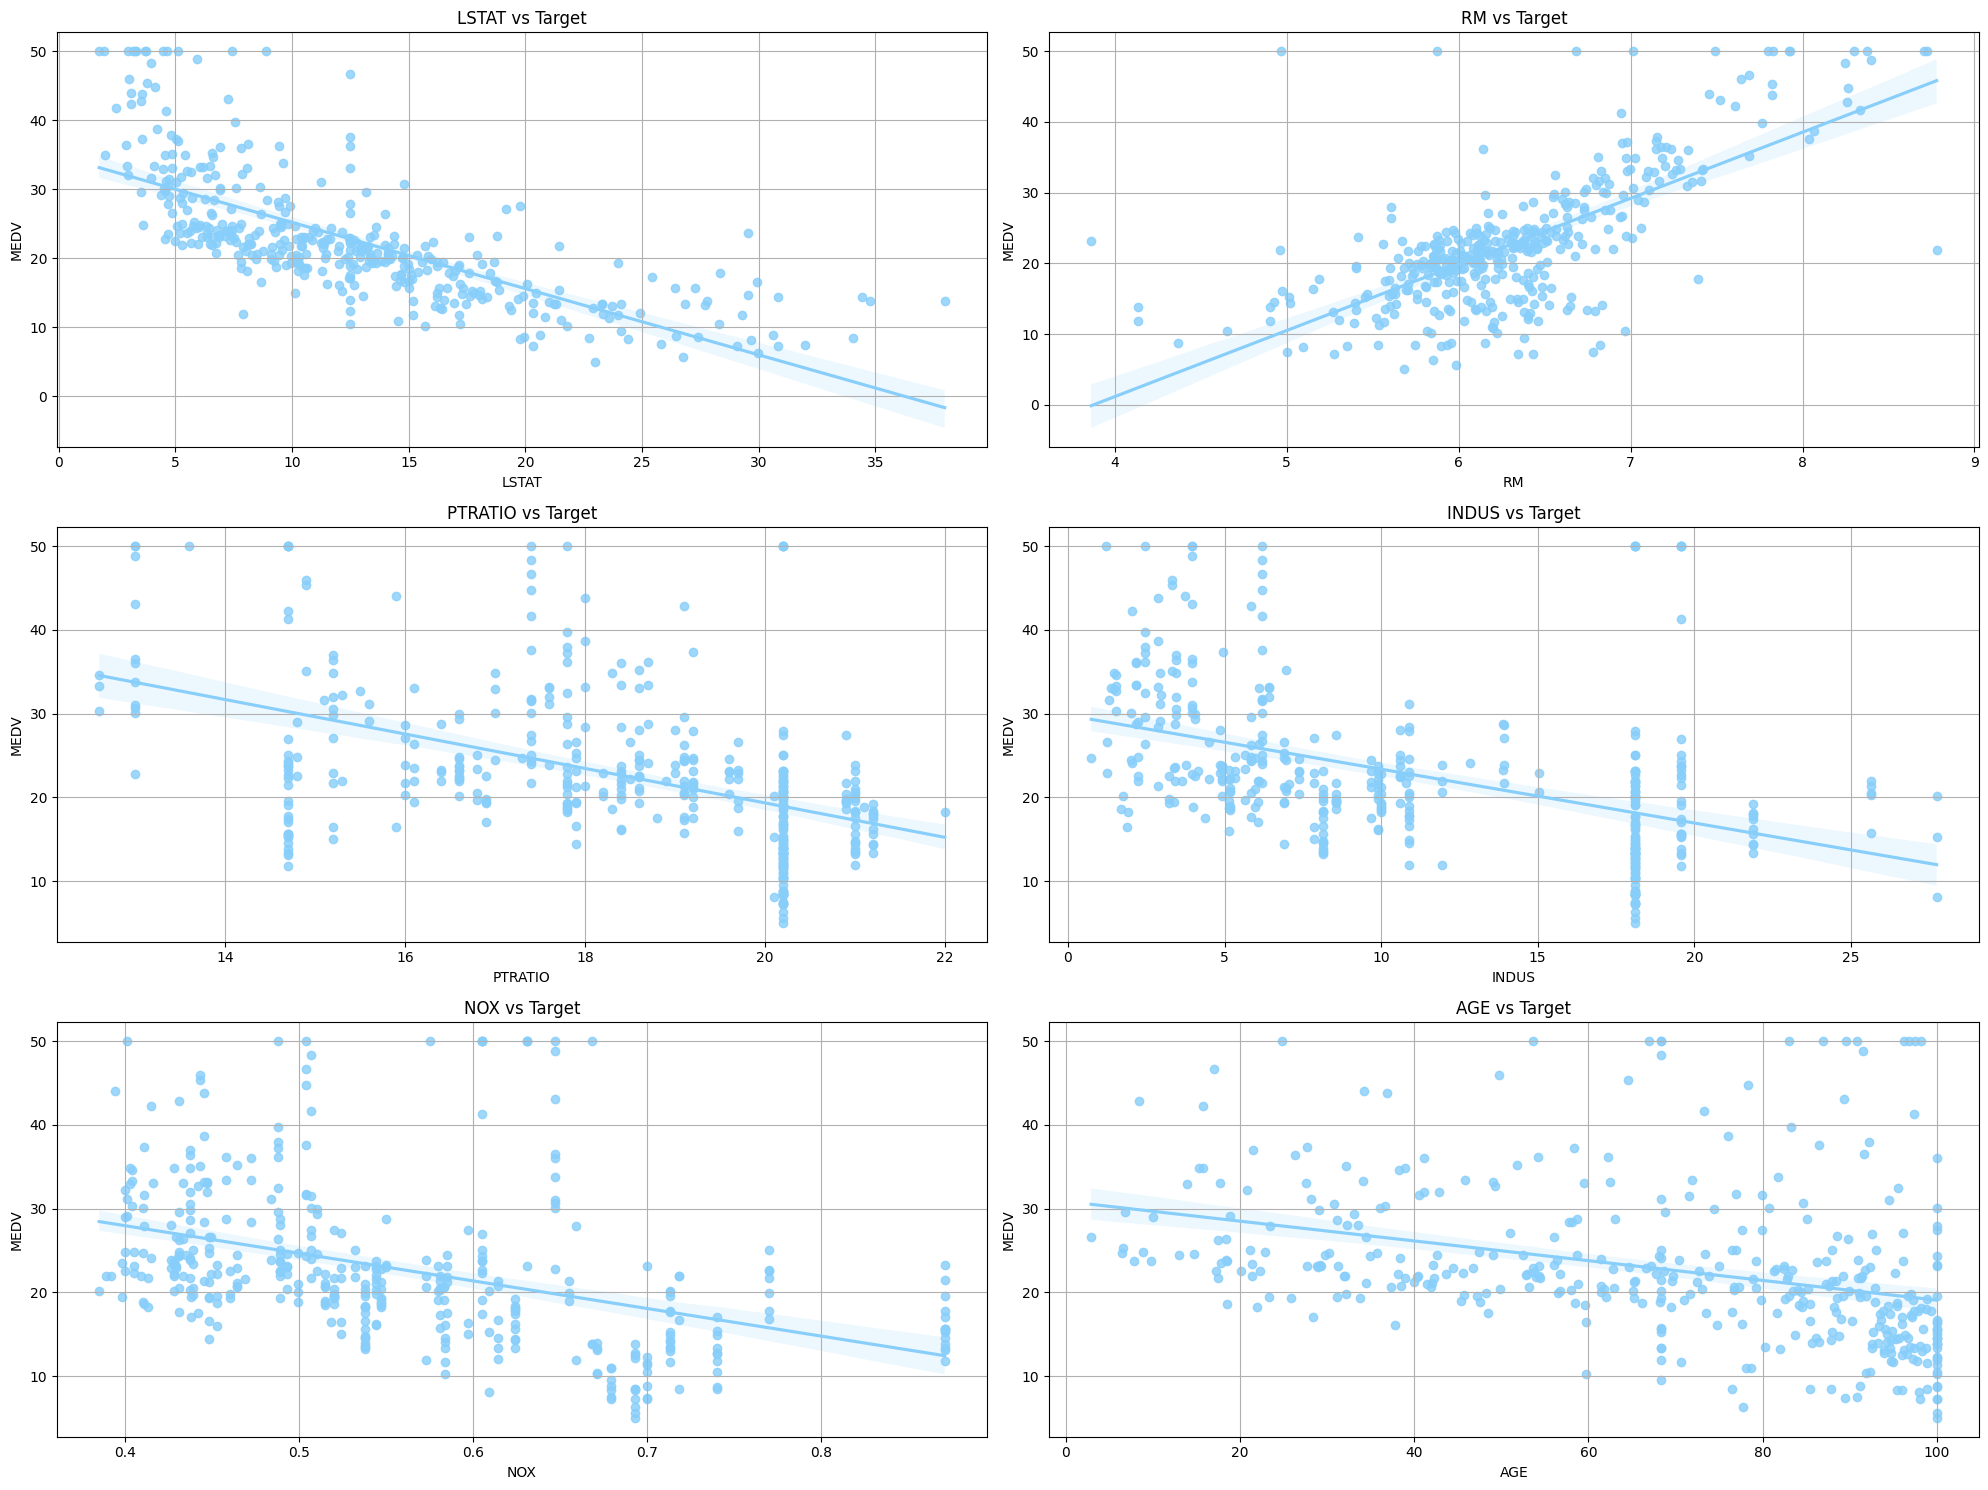

In [19]:
# Ensure x_train_sorted is a DataFrame and y_train_sorted is a Series
if not isinstance(x_train_sorted, pd.DataFrame):
    x_train_sorted = pd.DataFrame(x_train_sorted)
if not isinstance(y_train_sorted, pd.Series):
    y_train_sorted = pd.Series(y_train_sorted, name='Target')

# Create the subplot grid
fig, ax1 = plt.subplots(3, 2, figsize=(20, 15))

# List of columns to plot
columns = ["LSTAT", "RM", "PTRATIO", "INDUS", "NOX", "AGE"]
k = 0

# Plot regression plots for each feature
for i in range(3):
    for j in range(2):
        # Use keyword arguments x and y for sns.regplot
        sns.regplot(x=x_train_sorted[columns[k]], y=y_train_sorted, ax=ax1[i][j], color="lightskyblue")
        ax1[i][j].grid(True)
        ax1[i][j].set_title(f"{columns[k]} vs Target")  # Optional: Add title for clarity
        k += 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

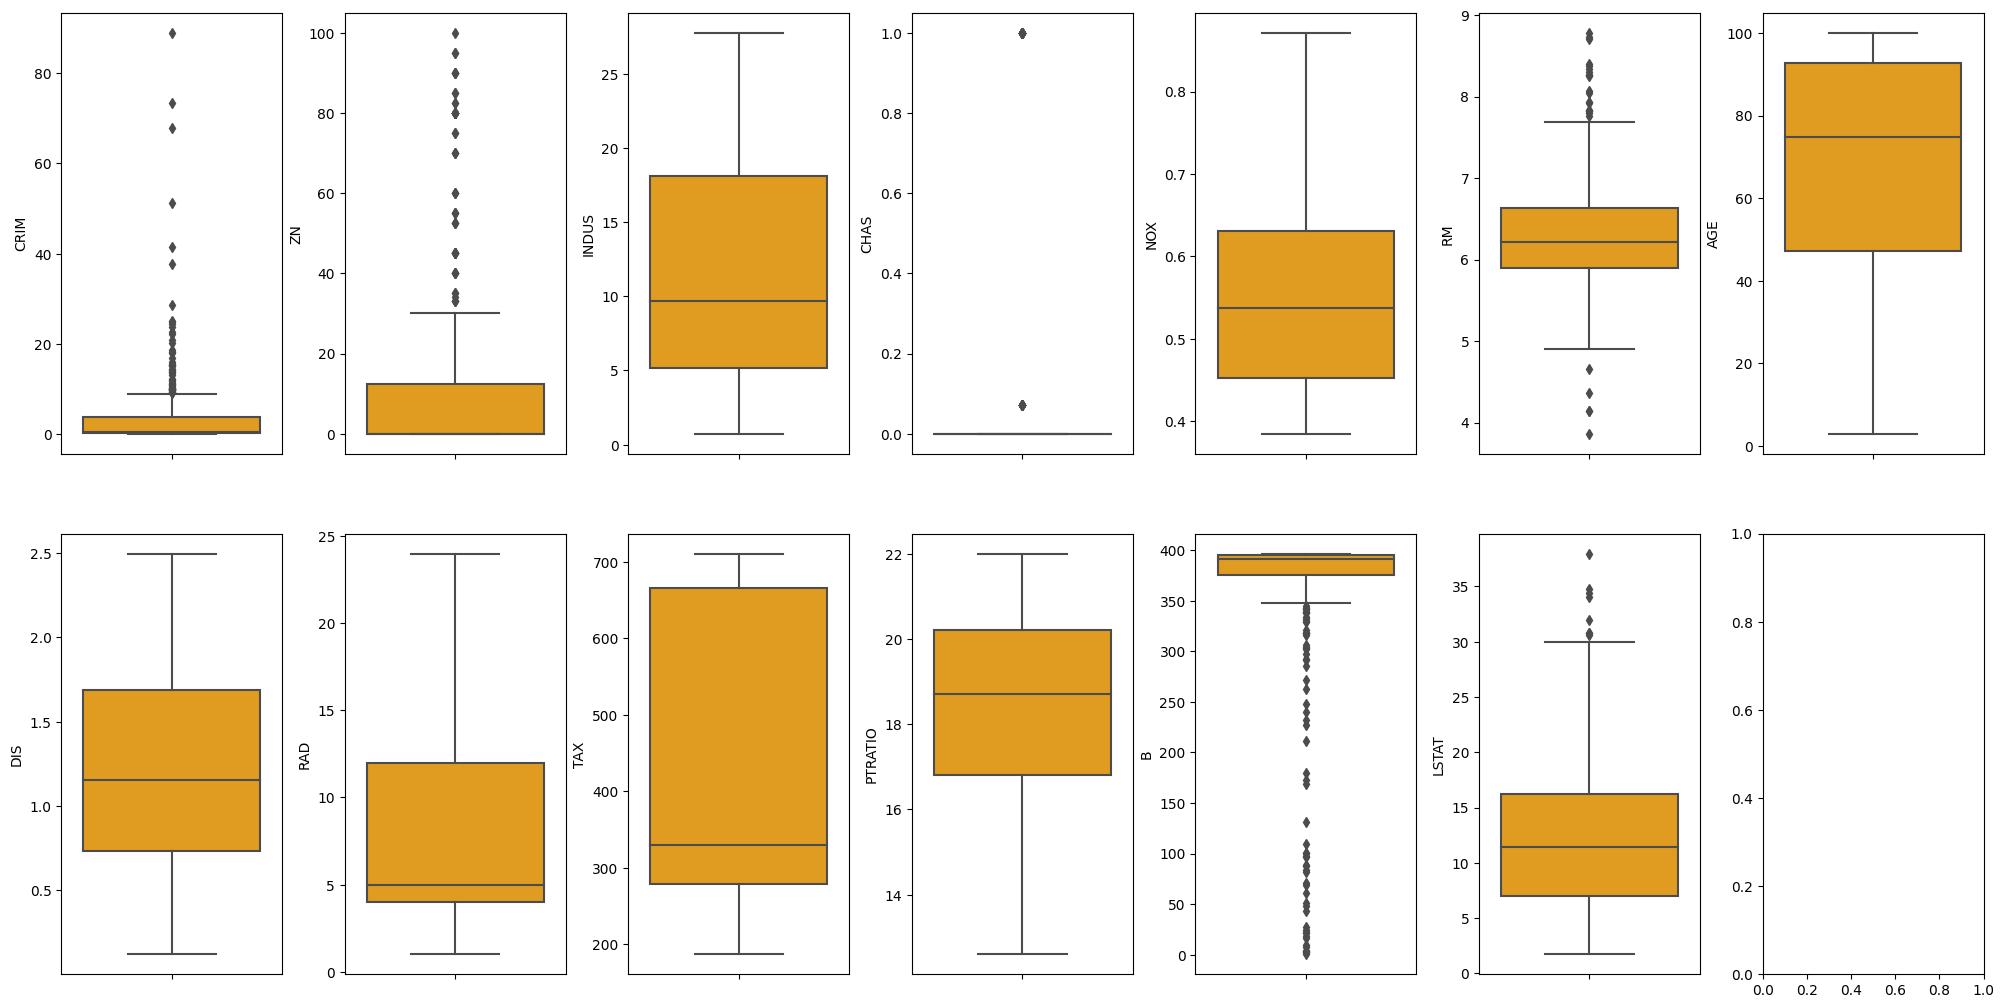

Column CRIM outliers = 12.38%
Column ZN outliers = 12.87%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.94%
Column AGE outliers = 0.00%
Column DIS outliers = 0.00%
Column RAD outliers = 25.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 0.00%
Column B outliers = 15.59%
Column LSTAT outliers = 1.98%


In [20]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in x_train_sorted.items():
    sns.boxplot(y=k, data=x_train_sorted, ax=axs[index],color="orange")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

for k, v in x_train_sorted.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(x_train_sorted)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

# Features Engineering

## Data Normalization

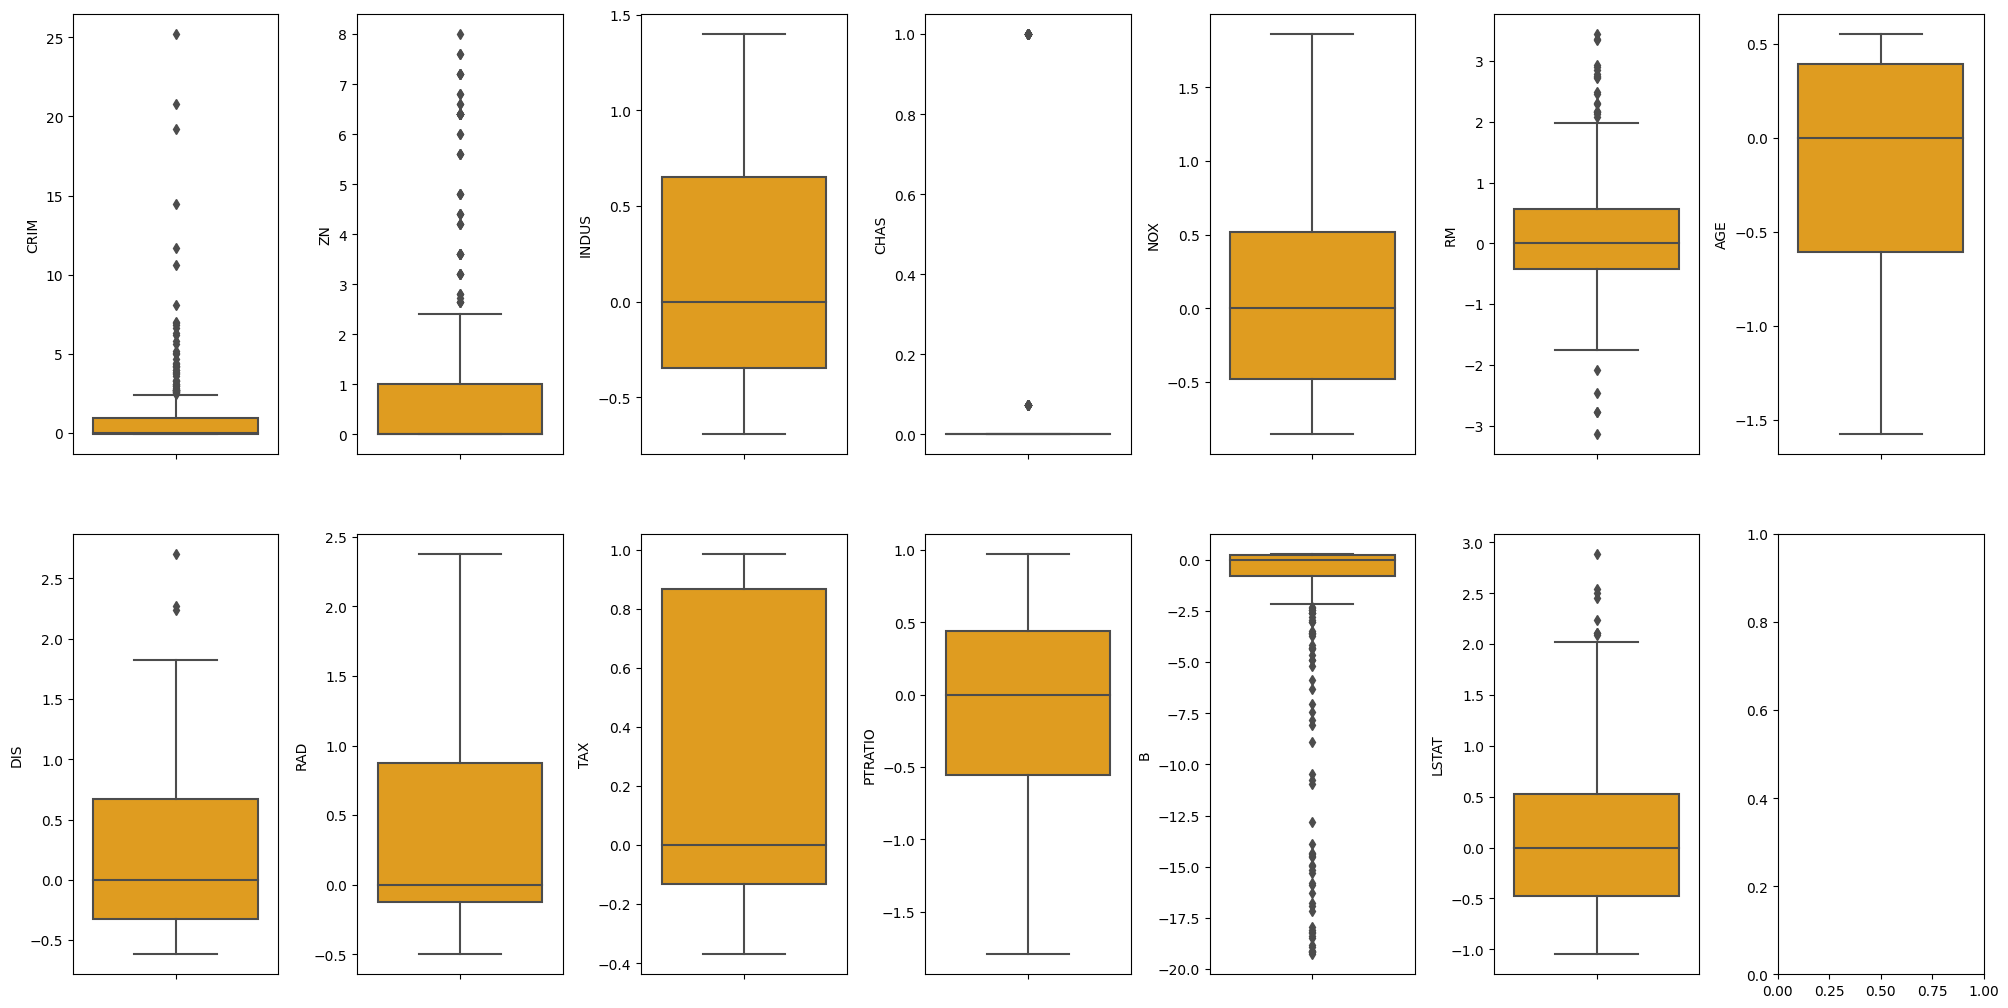

Column CRIM outliers = 12.38%
Column ZN outliers = 12.87%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.94%
Column AGE outliers = 0.00%
Column DIS outliers = 0.74%
Column RAD outliers = 25.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 0.00%
Column B outliers = 15.59%
Column LSTAT outliers = 1.98%


In [21]:
# Ensure x_train_sorted is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Initialize the RobustScaler
scaler = RobustScaler()

# Scale the data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train_sorted.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test_sorted.columns)
# Calculate outlier percentages for the scaled data (optional, for display)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in x_train_scaled.items():
    sns.boxplot(y=k, data=x_train_scaled, ax=axs[index],color="orange")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

for k, v in x_train_scaled.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(x_train_scaled)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

# Modeling

# Linear Regression

In [22]:
lr = LinearRegression().fit(x_train_scaled, y_train)

In [23]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-0.40171057  0.36388399 -0.34789838  3.23839192 -2.86624273  3.54267165
 -0.8890693  -5.04272659  1.78282498 -3.54499523 -3.01333246  0.24823558
 -4.0462899 ]
lr.intercept_: 23.536746523343655


In [24]:
print("Training set score: {:.2f}".format(lr.score(x_train_scaled, y_train)))

Training set score: 0.74


## Model fitting on train dataset (before hyperparameters tuning)

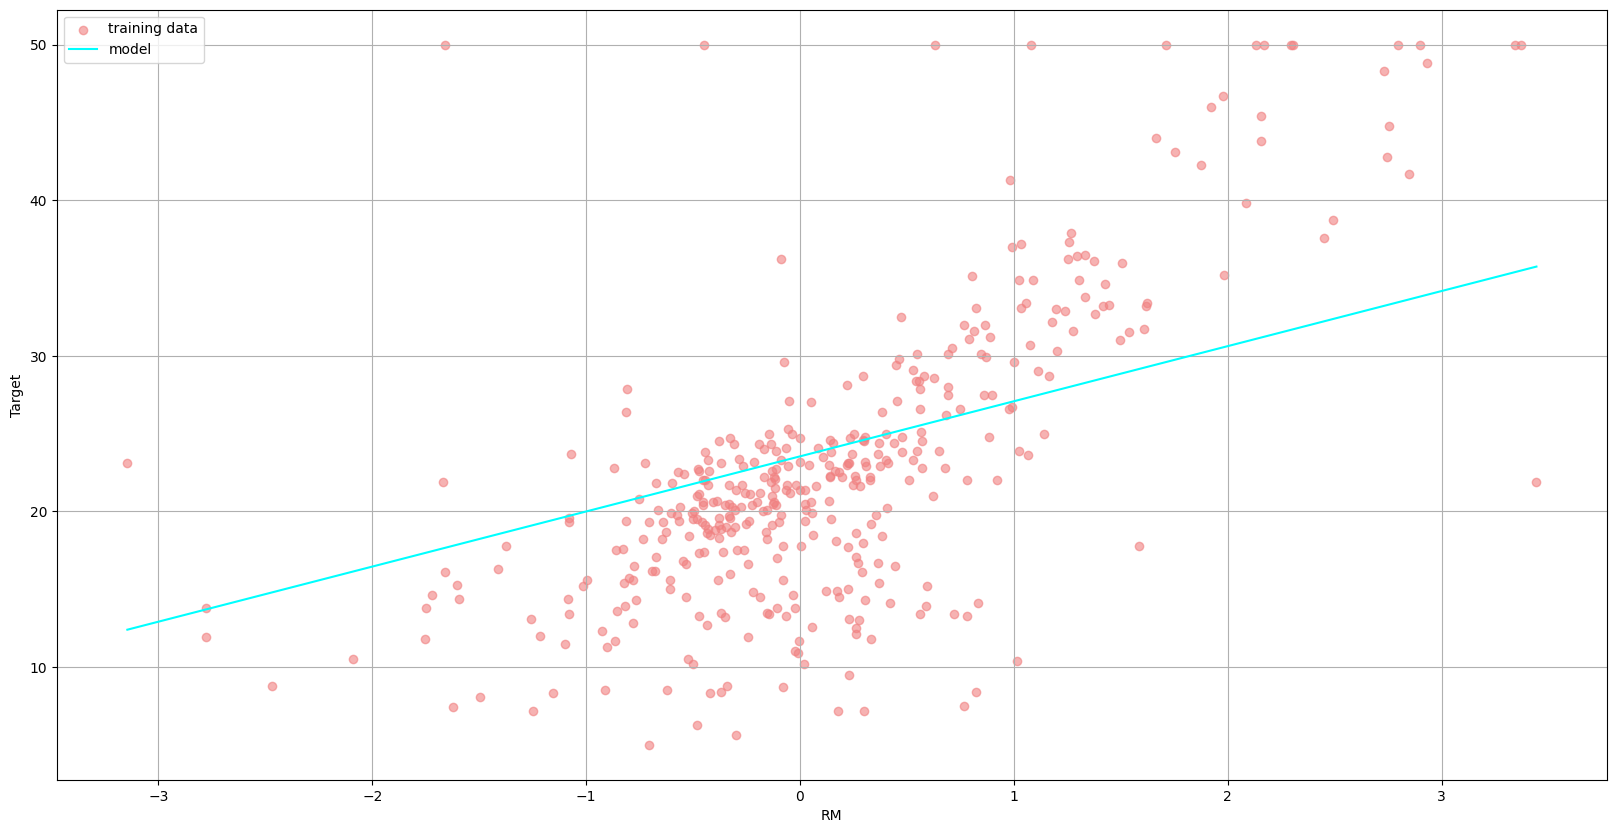

In [25]:
# Select the feature to visualize (e.g., 'RM', which has a strong positive coefficient)
feature_to_plot = 'RM'
feature_idx = x_train_scaled.columns.get_loc(feature_to_plot)  # Get the index of 'RM'

# Create the scatter plot of the training data
plt.figure(figsize=(20, 10))
plt.scatter(x_train_scaled[feature_to_plot], y_train, color="lightcoral", label="training data", alpha=0.6)

# Create the model's prediction line
# To plot the line, we need to vary the selected feature while keeping others constant (e.g., at 0 since data is scaled)
x_range = np.linspace(x_train_scaled[feature_to_plot].min(), x_train_scaled[feature_to_plot].max(), 100).reshape(-1, 1)
x_full = np.zeros((100, x_train_scaled.shape[1]))  # Create a matrix with all features set to 0
x_full[:, feature_idx] = x_range.flatten()  # Set the selected feature to the range of values
y_pred = lr.predict(x_full)

# Plot the model's prediction line
plt.plot(x_range, y_pred, color="cyan", label="model")

# Add labels, legend, and grid
plt.xlabel(feature_to_plot)
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()

## Hyperparameters tuning (Linear Regression)

In [26]:
# Define the model
lr = LinearRegression()

# Define the hyperparameter search space for Linear Regression (there aren't many to tune directly)
# We can explore the 'fit_intercept' parameter, although it's often kept as True.
# For demonstration, we'll include it in the search space.
param_space = {
    'fit_intercept': [True, False]
}

# Initialize BayesianSearchCV
# - estimator: The model to tune
# - search_spaces: The dictionary defining the hyperparameters to search and their ranges
# - n_iter: The number of optimization iterations
# - cv: The cross-validation strategy
bayes_search = BayesSearchCV(
    estimator=lr,
    search_spaces=param_space,
    n_iter=20,  # Adjust as needed for more exploration
    cv=5,       # Use cross-validation for robust evaluation
    random_state=42,
    verbose=1
)

# Perform the Bayesian search
bayes_search.fit(x_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", bayes_search.best_params_)

# Get the best model
best_lr = bayes_search.best_estimator_

# Evaluate the best model on the test set
score = best_lr.score(x_train_scaled, y_train)
print("Test set R^2 score with best hyperparameters:", score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Model fitting on train dataset (before hyperparameters tuning)

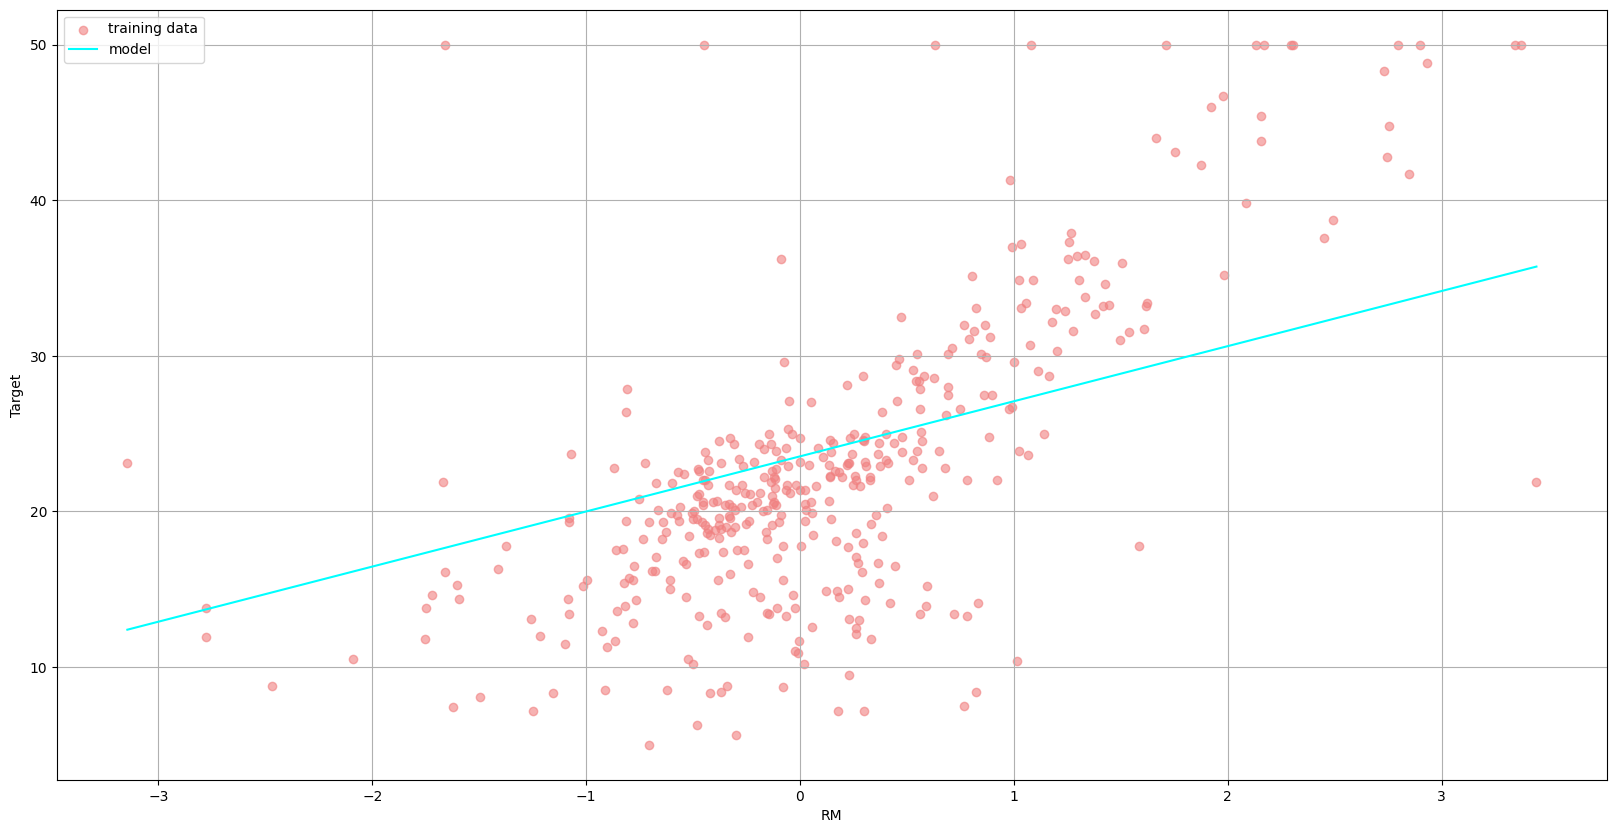

In [27]:
# Select the feature to visualize (e.g., 'RM', as in the attached image)
feature_to_plot = 'RM'
feature_idx = x_train_scaled.columns.get_loc(feature_to_plot)  # Get the index of 'RM'

# Create the scatter plot of the training data
plt.figure(figsize=(20, 10))
plt.scatter(x_train_scaled[feature_to_plot], y_train, color="lightcoral", label="training data", alpha=0.6)

# Create the model's prediction line
# To plot the line, vary the selected feature while keeping others constant (e.g., at 0 since data is scaled)
x_range = np.linspace(x_train_scaled[feature_to_plot].min(), x_train_scaled[feature_to_plot].max(), 100).reshape(-1, 1)
x_full = np.zeros((100, x_train_scaled.shape[1]))  # Create a matrix with all features set to 0
x_full[:, feature_idx] = x_range.flatten()  # Set the selected feature to the range of values
y_pred = best_lr.predict(x_full)

# Plot the model's prediction line
plt.plot(x_range, y_pred, color="cyan", label="model")

# Add labels, legend, and grid
plt.xlabel(feature_to_plot)
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()

# Ridge Regression

## Affect of alpha to Ridge regression (coefficient index)

In [28]:
ridge = Ridge().fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge.score(x_train_scaled, y_train)))

Training set score: 0.74


In [29]:
ridge1 = Ridge(alpha=0.01).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge1.score(x_train_scaled, y_train)))

Training set score: 0.74


In [30]:
x_train_scaled
ridge50 = Ridge(alpha=50).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge50.score(x_train_scaled, y_train)))

Training set score: 0.72


In [31]:
x_train_scaled
ridge100 = Ridge(alpha=100).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge100.score(x_train_scaled, y_train)))

Training set score: 0.70


## Visualize affect of alpha to Ridge regression

Training set score: 0.74
Training set score: 0.70
Training set score: 0.72
Training set score: 0.74
Training set score: 0.74
Training set score: 0.74


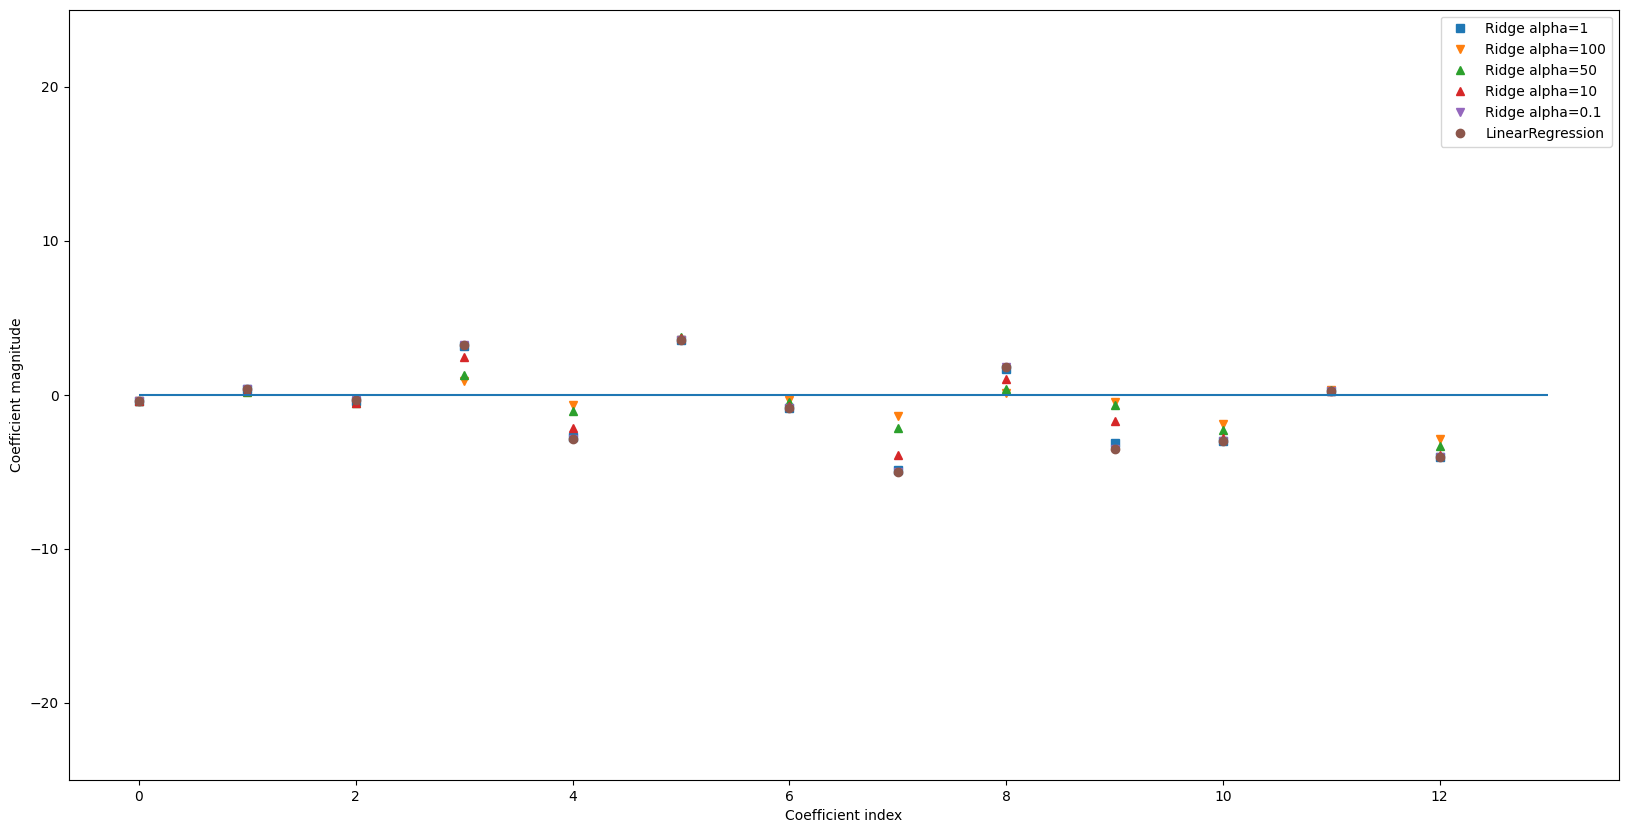

In [32]:
# Ensure x_train_scaled is a DataFrame and y_train is a Series
if not isinstance(x_train_scaled, pd.DataFrame):
    x_train_scaled = pd.DataFrame(x_train_scaled)
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name='Target')

# Train the Ridge models with different alpha values and LinearRegression
ridge = Ridge().fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge.score(x_train_scaled, y_train)))

ridge100 = Ridge(alpha=100).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge100.score(x_train_scaled, y_train)))

ridge50 = Ridge(alpha=50).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge50.score(x_train_scaled, y_train)))

ridge10 = Ridge(alpha=10).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge10.score(x_train_scaled, y_train)))

ridge01 = Ridge(alpha=0.01).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge01.score(x_train_scaled, y_train)))

lr = LinearRegression().fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(lr.score(x_train_scaled, y_train)))

# Plot the coefficients
plt.figure(figsize=(20, 10))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge100.coef_, 'v', label="Ridge alpha=100")
plt.plot(ridge50.coef_, '^', label="Ridge alpha=50")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

# Add labels and reference line
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

# Add legend
plt.legend()
plt.show()

## Hyperparameter tuning (Ridge)

In [33]:
# Define the model
ridge = Ridge()

# Define the hyperparameter search space for Ridge
param_space = {
    'alpha': Real(1e-6, 100.0, prior='log-uniform'),
    'fit_intercept': Categorical([True, False]),
    'solver': Categorical(['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']),  # Removed 'sparse_cg'
    'tol': Real(0.0001, 0.1, prior='log-uniform'),
    'max_iter': Integer(100, 1000, prior='uniform')  # Only relevant for certain solvers
}

# Initialize BayesianSearchCV
bayes_search = BayesSearchCV(
    estimator=ridge,
    search_spaces=param_space,
    n_iter=30,  # Increased iterations for more exploration
    cv=5,
    scoring='r2',
    random_state=42,
    verbose=1
)

# Perform the Bayesian search
bayes_search.fit(x_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", bayes_search.best_params_)

# Get the best model
best_ridge = bayes_search.best_estimator_

# Evaluate the best model on the training set
train_score = best_ridge.score(x_train_scaled, y_train)
print("Training set R^2 score with best hyperparameters: {:.2f}".format(train_score))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Model validation (Ridge) 

In [34]:
# Make predictions
y_train_pred = best_ridge.predict(x_train_scaled)

# Evaluate the model
def evaluate_regression(y_true, y_pred, dataset_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{dataset_name} Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")
    return r2, mae, mse, rmse

# Evaluate on training and test sets
evaluate_regression(y_train, y_train_pred, "Training Set")

Training Set Metrics:
R² Score: 0.7422
Mean Absolute Error (MAE): 3.3579
Mean Squared Error (MSE): 22.4002
Root Mean Squared Error (RMSE): 4.7329



(0.7421507759510921, 3.3578722773791556, 22.400239768815528, 4.732889156616234)

## Visualization : Actual vs. Predicted Plot

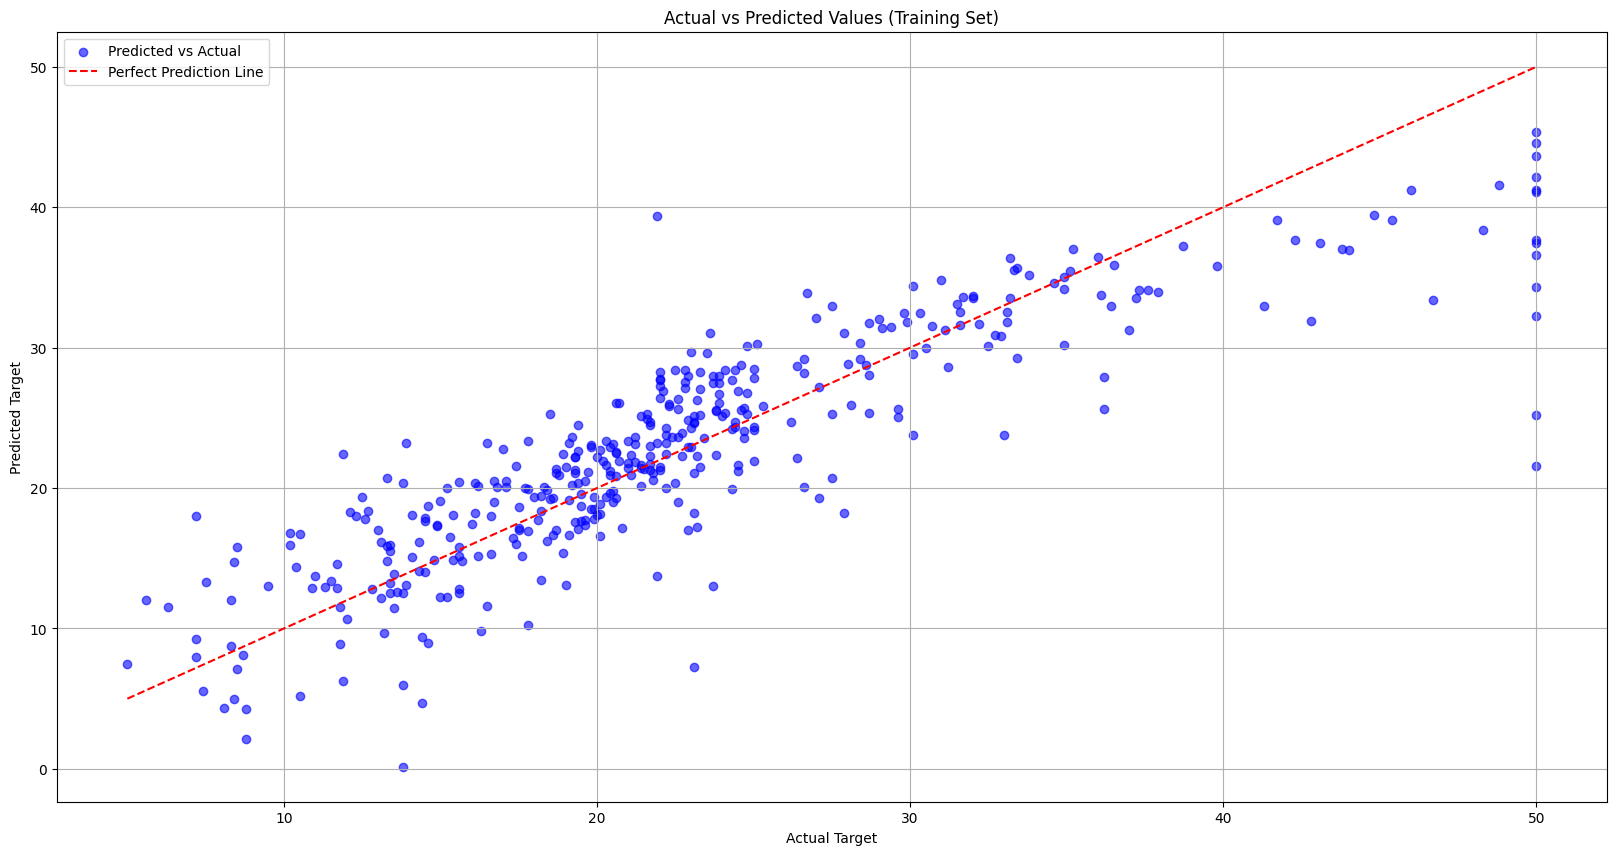

In [35]:
# Visualization : Actual vs. Predicted Plot (Training Set)
plt.figure(figsize=(20, 10))
plt.scatter(y_train, y_train_pred, color="blue", label="Predicted vs Actual", alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted Values (Training Set)")
plt.legend()
plt.grid(True)
plt.show()

## Visualization : Residual Plot (Training Set)

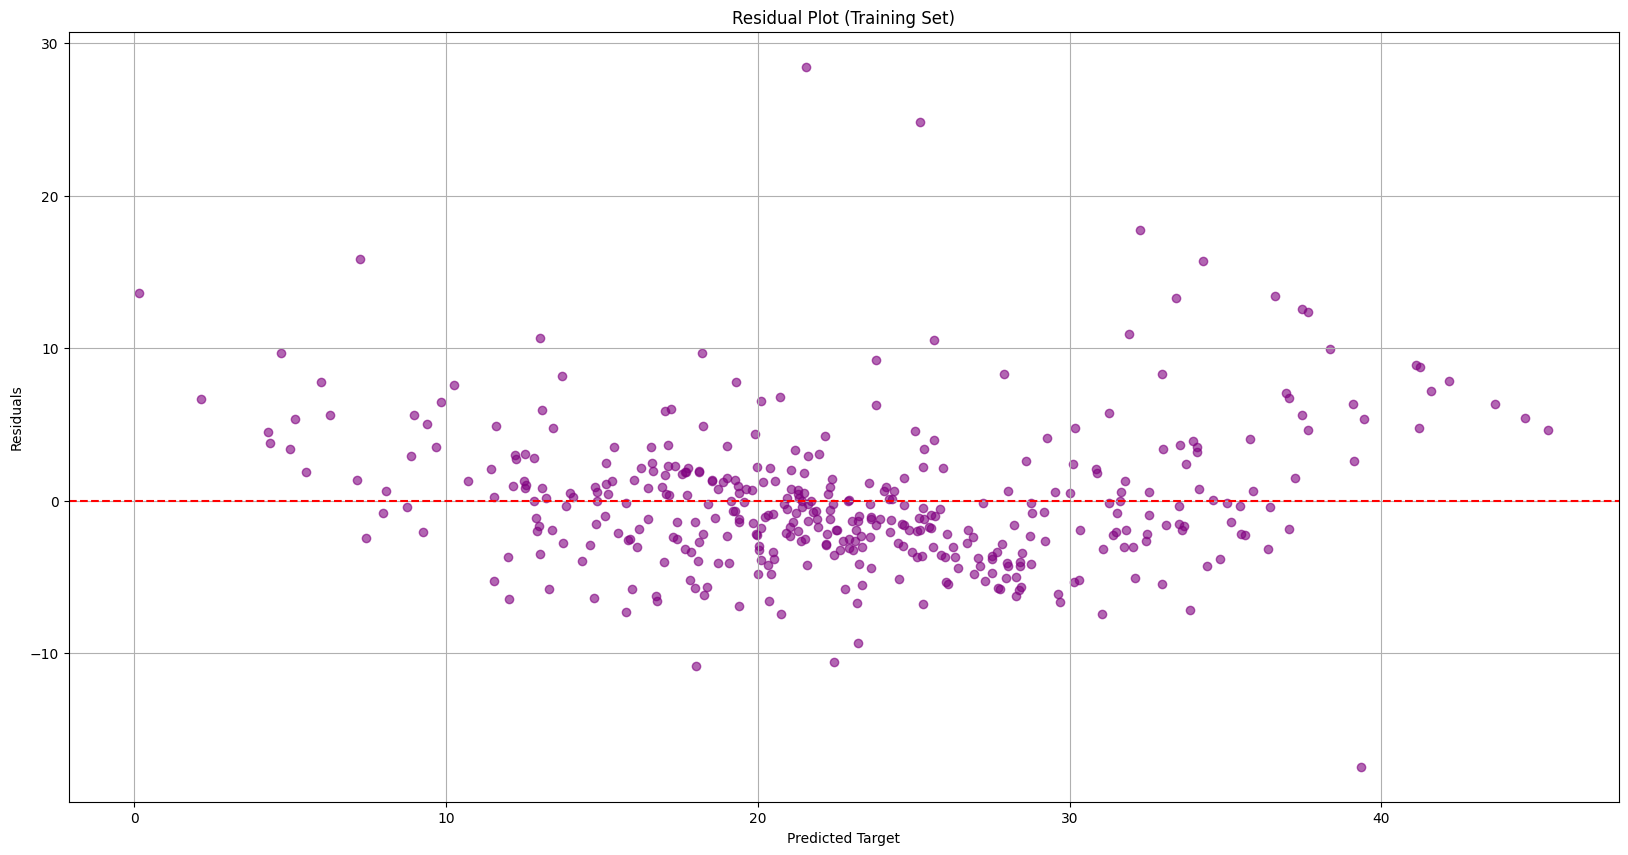

In [36]:
# Visualization : Residual Plot (Training Set)
residuals_train = y_train - y_train_pred
plt.figure(figsize=(20, 10))
plt.scatter(y_train_pred, residuals_train, color="purple", alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Target")
plt.ylabel("Residuals")
plt.title("Residual Plot (Training Set)")
plt.grid(True)
plt.show()

## Visualization : Feature vs. Target with Model Line (Training Set, using 'RM')

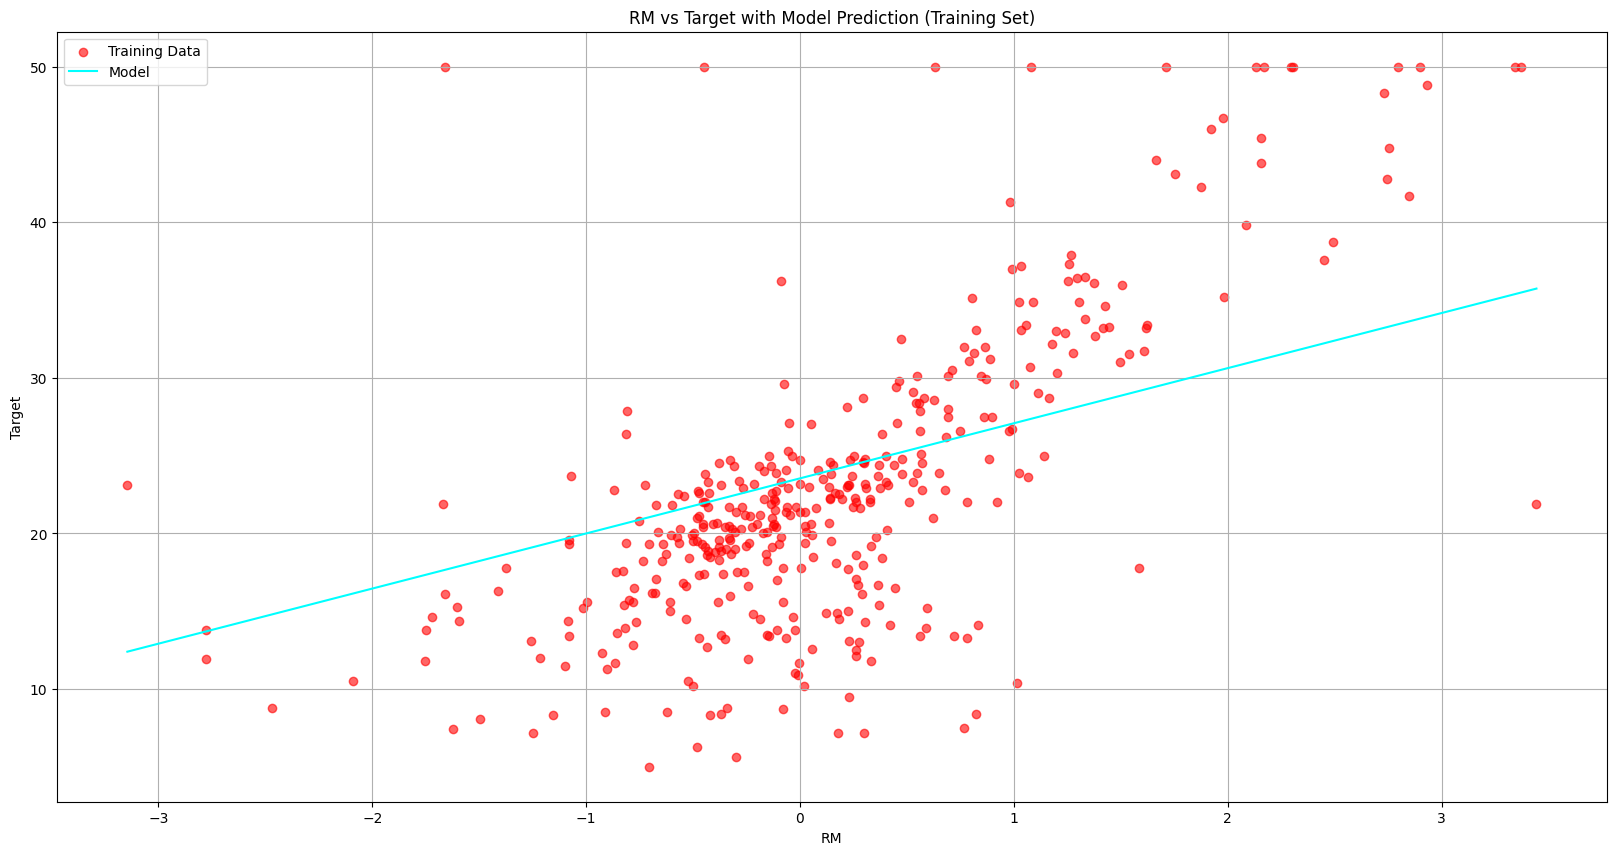

In [37]:
# Visualization : Feature vs. Target with Model Line (Training Set, using 'RM')
feature_to_plot = 'RM'
feature_idx = x_train_scaled.columns.get_loc(feature_to_plot)
plt.figure(figsize=(20, 10))
plt.scatter(x_train_scaled[feature_to_plot], y_train, color="red", label="Training Data", alpha=0.6)
x_range = np.linspace(x_train_scaled[feature_to_plot].min(), x_train_scaled[feature_to_plot].max(), 100).reshape(-1, 1)
x_full = np.zeros((100, x_train_scaled.shape[1]))
x_full[:, feature_idx] = x_range.flatten()
y_pred_line = best_ridge.predict(x_full)
plt.plot(x_range, y_pred_line, color="cyan", label="Model")
plt.xlabel(feature_to_plot)
plt.ylabel("Target")
plt.title(f"{feature_to_plot} vs Target with Model Prediction (Training Set)")
plt.legend()
plt.grid(True)
plt.show()

## Visualization : Coefficient Magnitude Plot

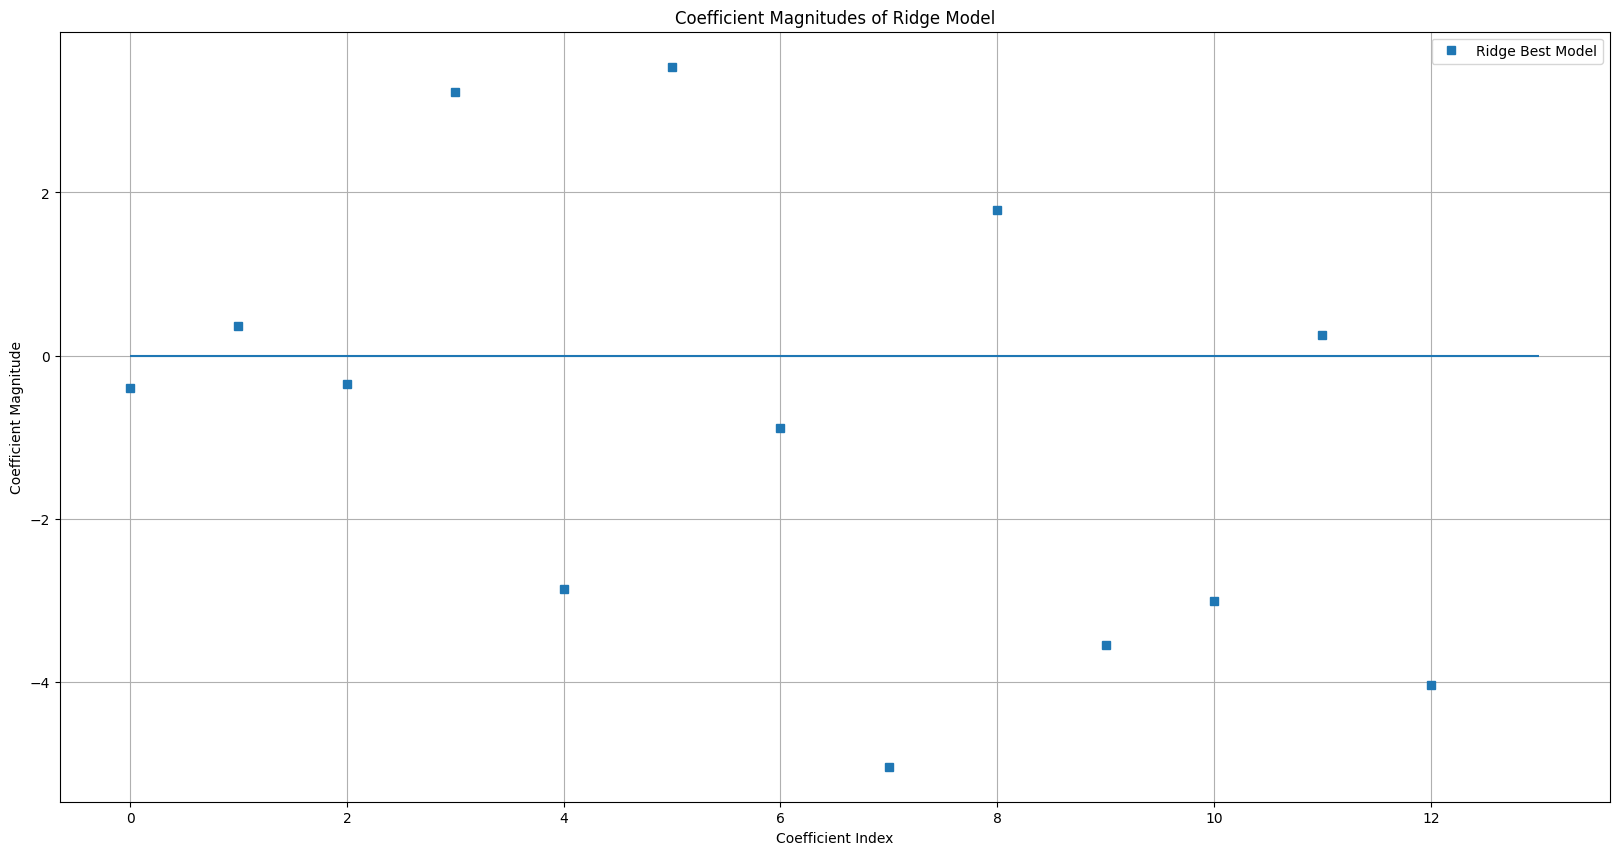

In [38]:
# Visualization : Coefficient Magnitude Plot (No change needed as it's model-centric)
plt.figure(figsize=(20, 10))
plt.plot(best_ridge.coef_, 's', label="Ridge Best Model")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.hlines(0, 0, len(best_ridge.coef_))
plt.title("Coefficient Magnitudes of Ridge Model")
plt.legend()
plt.grid(True)
plt.show()

# Lasso Regression

In [39]:
lasso = Lasso().fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso.score(x_train_scaled, y_train)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.66
Number of features used: 5


## Accuracy of each Lasso Regression on train dataset

In [40]:
# Define the models to evaluate
models = {
    'Lasso': Lasso(),
    'LassoCV': LassoCV(),
    'LassoLars': LassoLars(),
    'LassoLarsCV': LassoLarsCV(),
    'LassoLarsIC': LassoLarsIC()
}

# Use KFold cross-validation (standard for regression)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Loop through each model and perform cross-validation
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Perform cross-validation to get R² scores
    cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring='r2')

    # Fit the model on the full training data to compute training score and number of features
    model.fit(x_train_scaled, y_train)

    # Compute metrics
    train_score = model.score(x_train_scaled, y_train)
    num_features_used = np.sum(model.coef_ != 0)

    # Print results
    print(f"\tK-Fold Cross-Validation R² Scores: {cv_scores}")
    print(f"\tAverage K-Fold Cross-Validation R²: {cv_scores.mean():.2f} (± {cv_scores.std():.2f})")
    print(f"\tTraining set score: {train_score:.2f}")
    print(f"\tNumber of features used: {num_features_used}")
    print('-' * 80)


Evaluating Lasso...
	K-Fold Cross-Validation R² Scores: [0.73177598 0.43486294 0.63408179 0.68618125 0.47327049 0.49214946
 0.71086827 0.75799479 0.71366081 0.77728951]
	Average K-Fold Cross-Validation R²: 0.64 (± 0.12)
	Training set score: 0.66
	Number of features used: 5
--------------------------------------------------------------------------------

Evaluating LassoCV...
	K-Fold Cross-Validation R² Scores: [0.78622371 0.52835895 0.69935681 0.78176162 0.61282895 0.61381938
 0.69379109 0.79877287 0.75760081 0.81259907]
	Average K-Fold Cross-Validation R²: 0.71 (± 0.09)
	Training set score: 0.74
	Number of features used: 13
--------------------------------------------------------------------------------

Evaluating LassoLars...
	K-Fold Cross-Validation R² Scores: [0.73177919 0.43487287 0.63408079 0.68618994 0.47326105 0.49215119
 0.71086956 0.7579991  0.71366267 0.77729054]
	Average K-Fold Cross-Validation R²: 0.64 (± 0.12)
	Training set score: 0.66
	Number of features used: 5
------

## Hyperparameter tuning (Lasso Regression)

In [41]:
# Define the models and their hyperparameter grids
models_params = {
    'LassoCV': {
        'model': LassoCV(),
        'param_grid': {
            'alphas': [np.logspace(-4, 1, 20)],  # Range of alpha values
            'max_iter': [1000, 5000, 10000],
            'tol': [1e-5, 1e-4, 1e-3],
            'cv': [5, 10]  # Internal CV folds for alpha selection
        }
    },
    'LassoLarsCV': {
        'model': LassoLarsCV(),
        'param_grid': {
            'max_iter': [1000, 5000, 10000],
            'eps': [1e-8, 1e-6, 1e-4],
            'max_n_alphas': [100, 500, 1000],
            'cv': [5, 10]  # Internal CV folds for alpha selection
        }
    },
    'LassoLarsIC': {
        'model': LassoLarsIC(),
        'param_grid': {
            'criterion': ['aic', 'bic'],
            'max_iter': [1000, 5000, 10000],
            'eps': [1e-8, 1e-6, 1e-4]
        }
    }
}

# Use KFold cross-validation (standard for regression)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Loop through each model, perform grid search, and evaluate
for model_name, config in models_params.items():
    print(f"\nTuning {model_name} with GridSearchCV...")

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['param_grid'],
        cv=kfold,
        scoring='r2',  # Optimize for R² score
        n_jobs=-1,  # Use all CPU cores
        verbose=1
    )

    # Fit GridSearchCV on the training data
    grid_search.fit(x_train_scaled, y_train)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    print(f"\tBest hyperparameters: {grid_search.best_params_}")
    print(f"\tBest cross-validation R² score: {grid_search.best_score_:.2f}")

    # Perform cross-validation with the best model to get detailed R² scores
    cv_scores = cross_val_score(best_model, x_train_scaled, y_train, cv=kfold, scoring='r2')

    # Fit the best model on the full training data to compute training score and number of features
    best_model.fit(x_train_scaled, y_train)

    # Compute metrics
    train_score = best_model.score(x_train_scaled, y_train)
    num_features_used = np.sum(best_model.coef_ != 0)

    # Print detailed results
    print(f"\tK-Fold Cross-Validation R² Scores: {cv_scores}")
    print(f"\tAverage K-Fold Cross-Validation R²: {cv_scores.mean():.2f} (± {cv_scores.std():.2f})")
    print(f"\tTraining set score: {train_score:.2f}")
    print(f"\tNumber of features used: {num_features_used}")
    print('-' * 80)


Tuning LassoCV with GridSearchCV...
Fitting 10 folds for each of 18 candidates, totalling 180 fits
	Best hyperparameters: {'alphas': array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01]), 'cv': 10, 'max_iter': 1000, 'tol': 0.001}
	Best cross-validation R² score: 0.71
	K-Fold Cross-Validation R² Scores: [0.78630855 0.52899693 0.7002307  0.78178932 0.61594727 0.616839
 0.69551132 0.80103651 0.75704803 0.81224573]
	Average K-Fold Cross-Validation R²: 0.71 (± 0.09)
	Training set score: 0.74
	Number of features used: 13
--------------------------------------------------------------------------------

Tuning LassoLarsCV with GridSearchCV...
Fitting 10 folds for each of 54 candidates, totalling 

## Model validation and Model visualization (Lasso Regression)


Evaluating LassoCV with Best Hyperparameters...
LassoCV - Training Set Metrics:
R² Score: 0.7419
Mean Absolute Error (MAE): 3.3401
Mean Squared Error (MSE): 22.4244
Root Mean Squared Error (RMSE): 4.7354



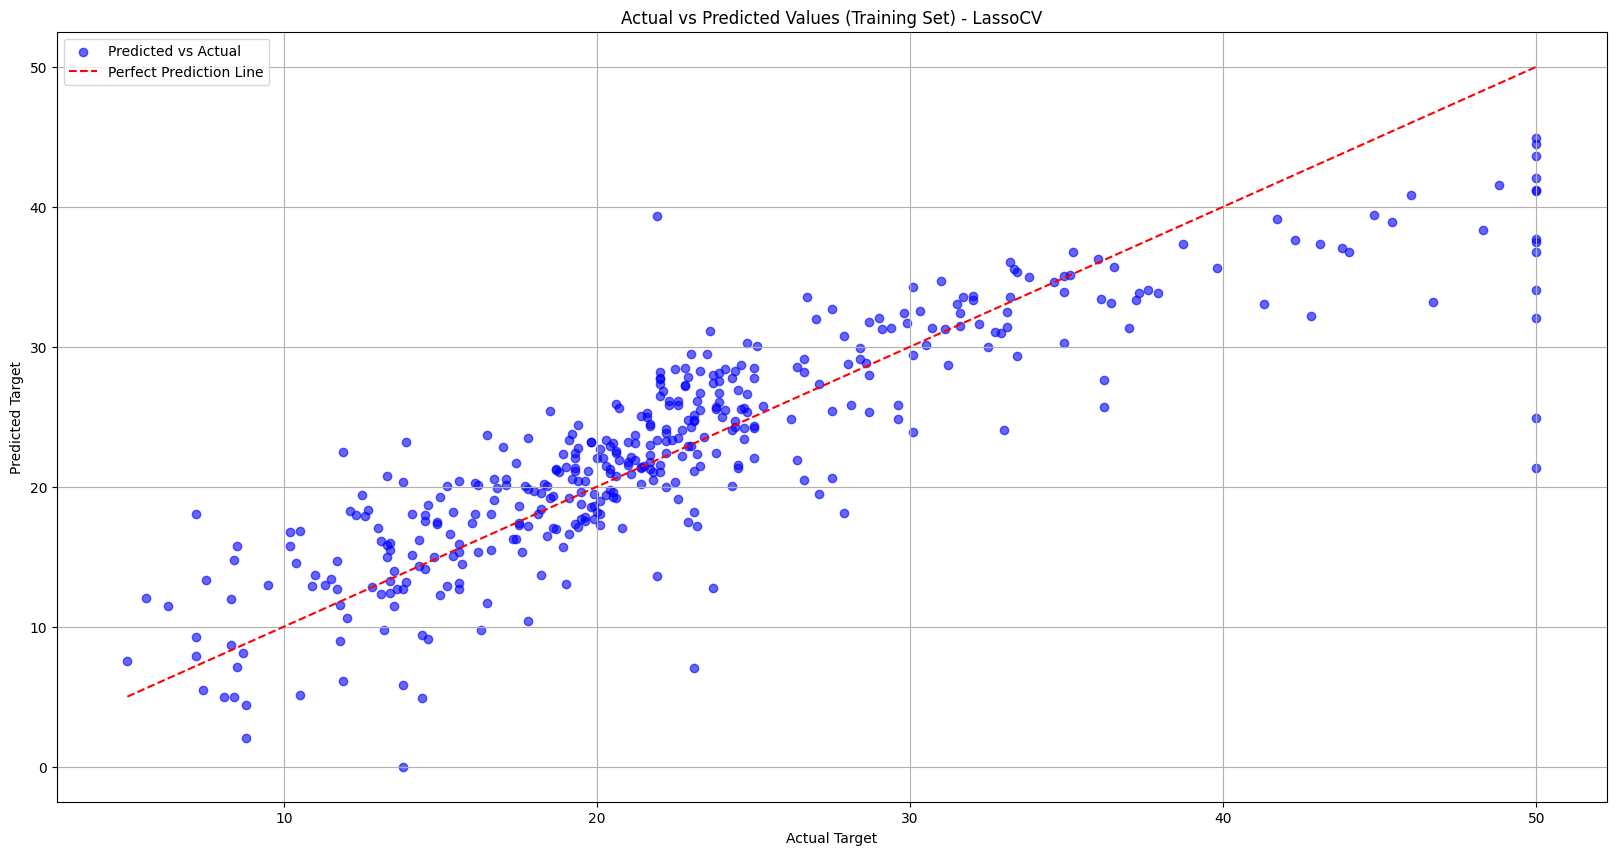

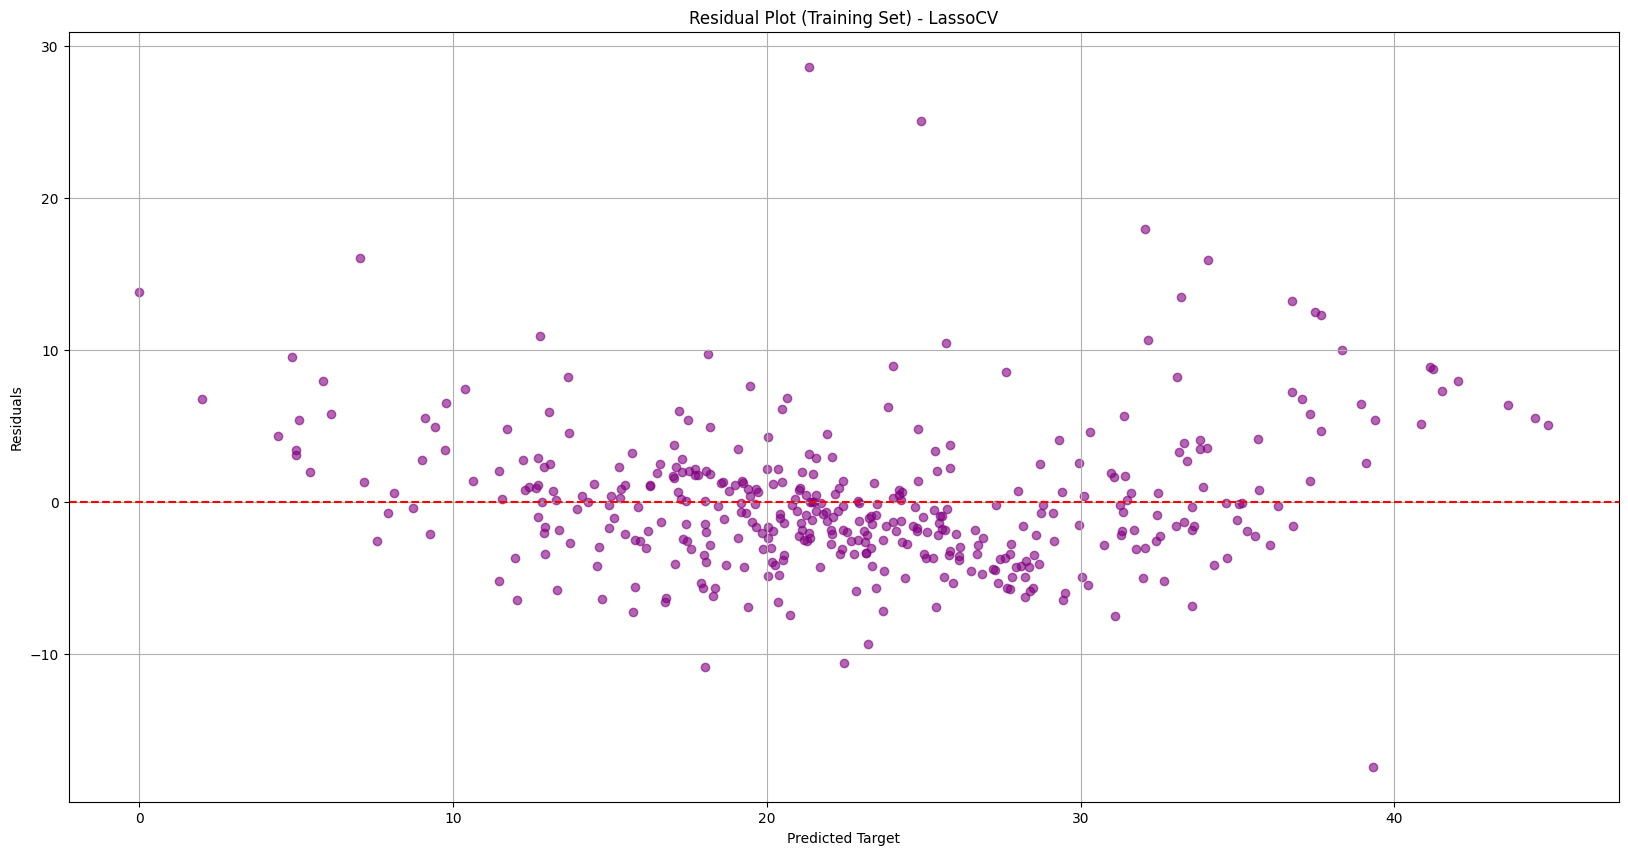

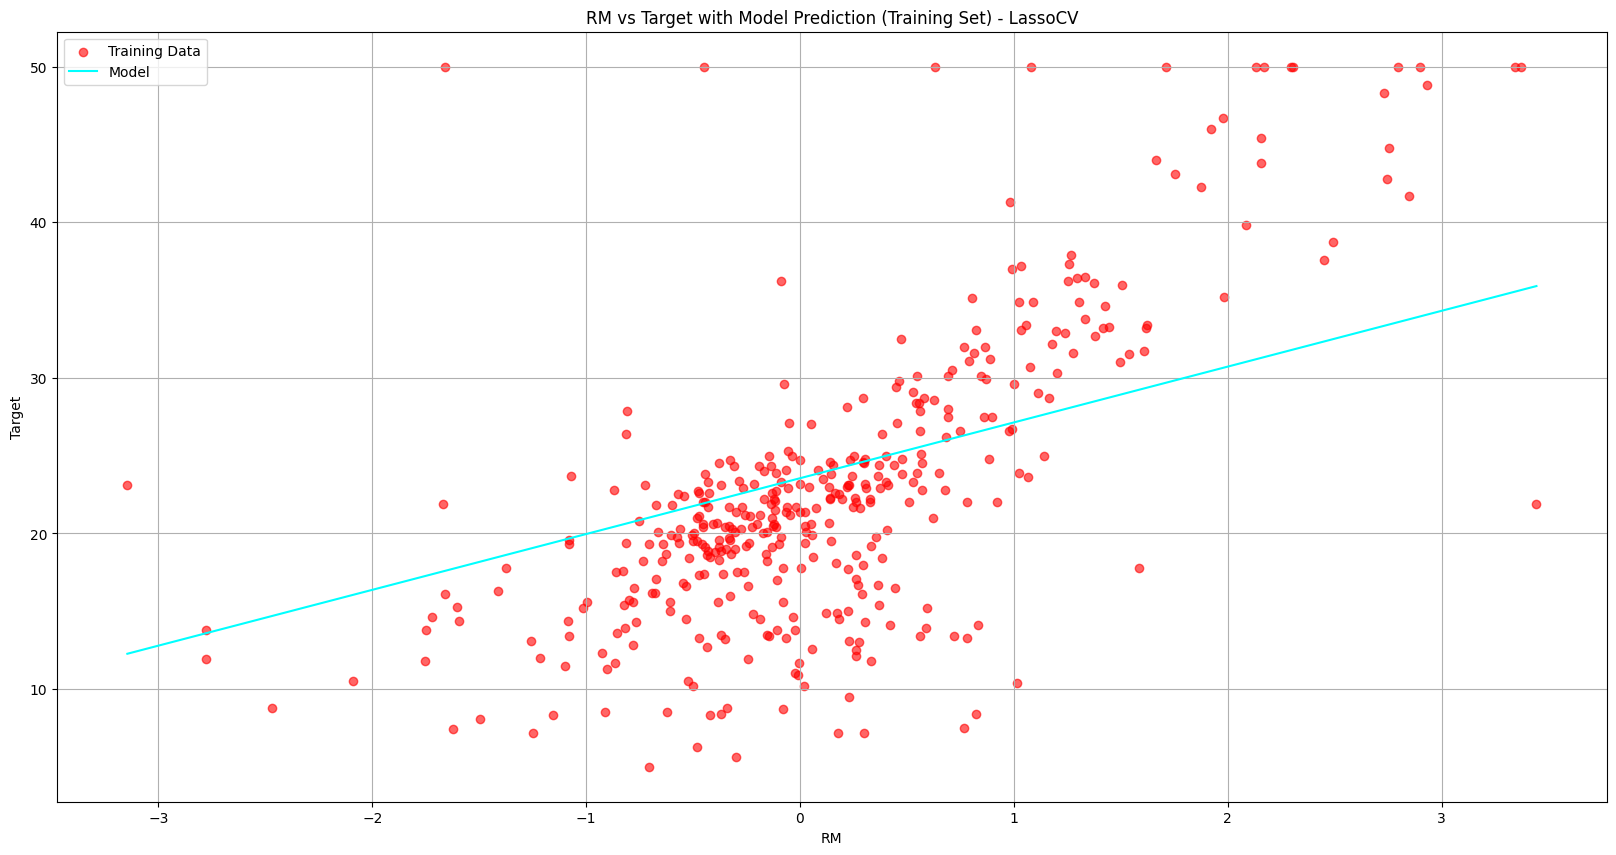

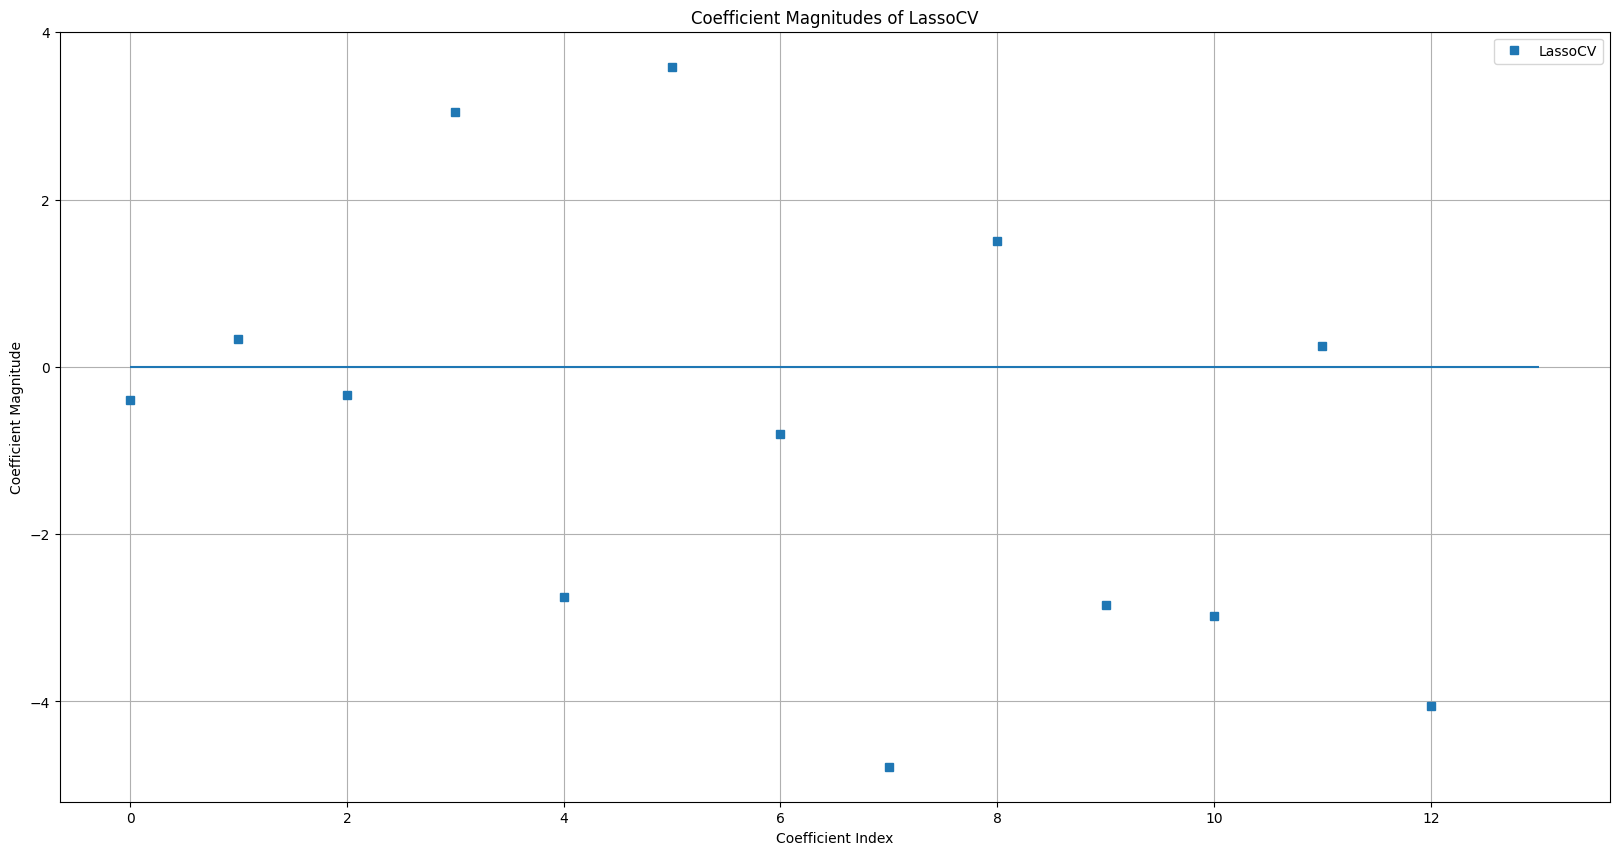


Evaluating LassoLarsCV with Best Hyperparameters...
LassoLarsCV - Training Set Metrics:
R² Score: 0.7421
Mean Absolute Error (MAE): 3.3488
Mean Squared Error (MSE): 22.4064
Root Mean Squared Error (RMSE): 4.7335



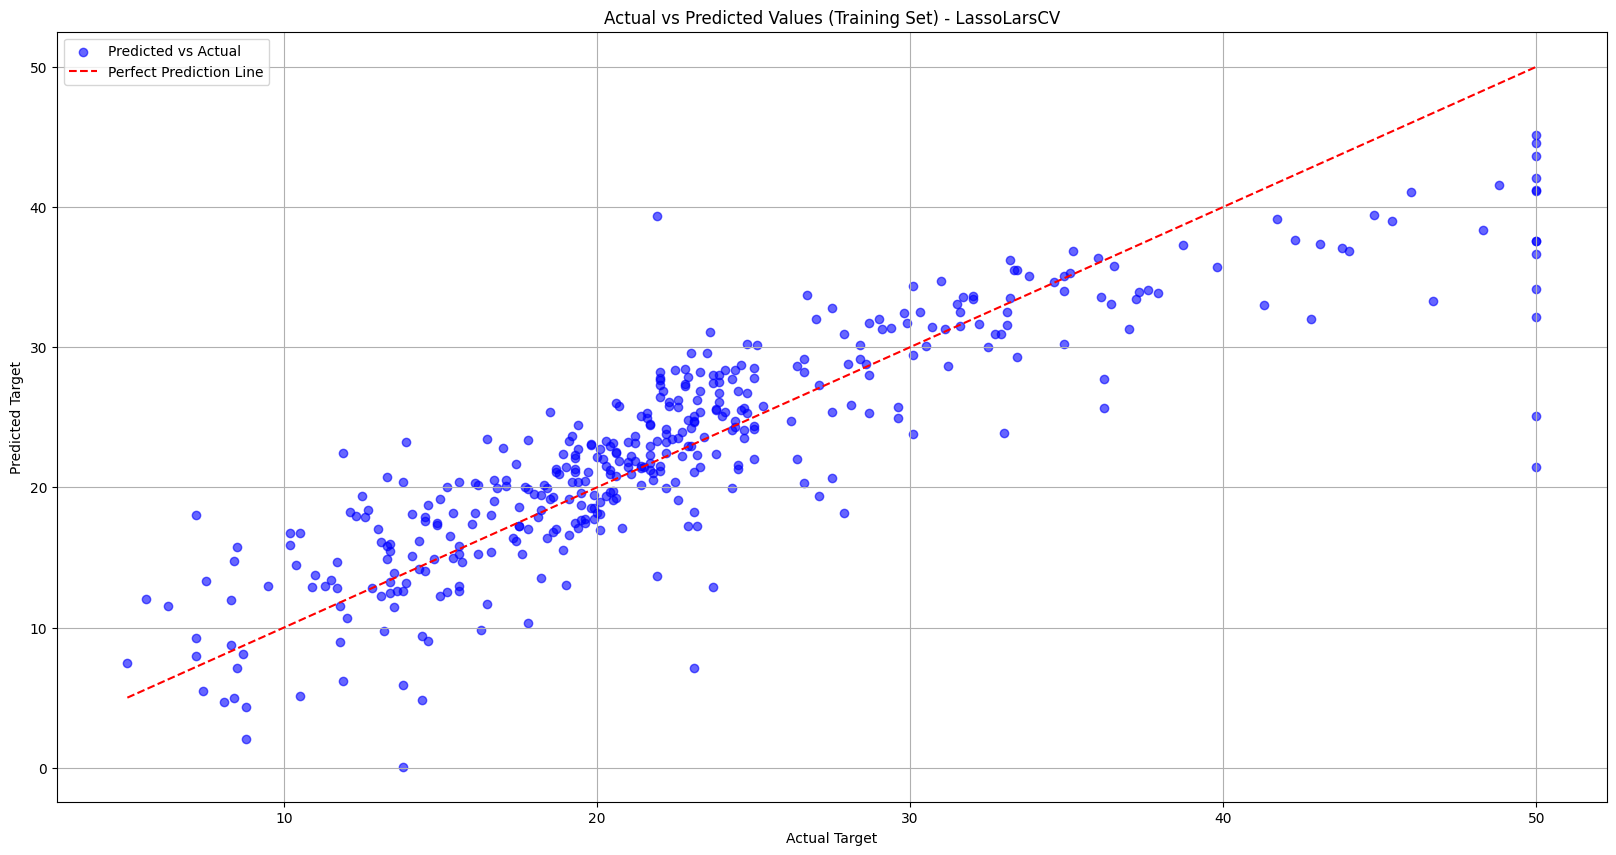

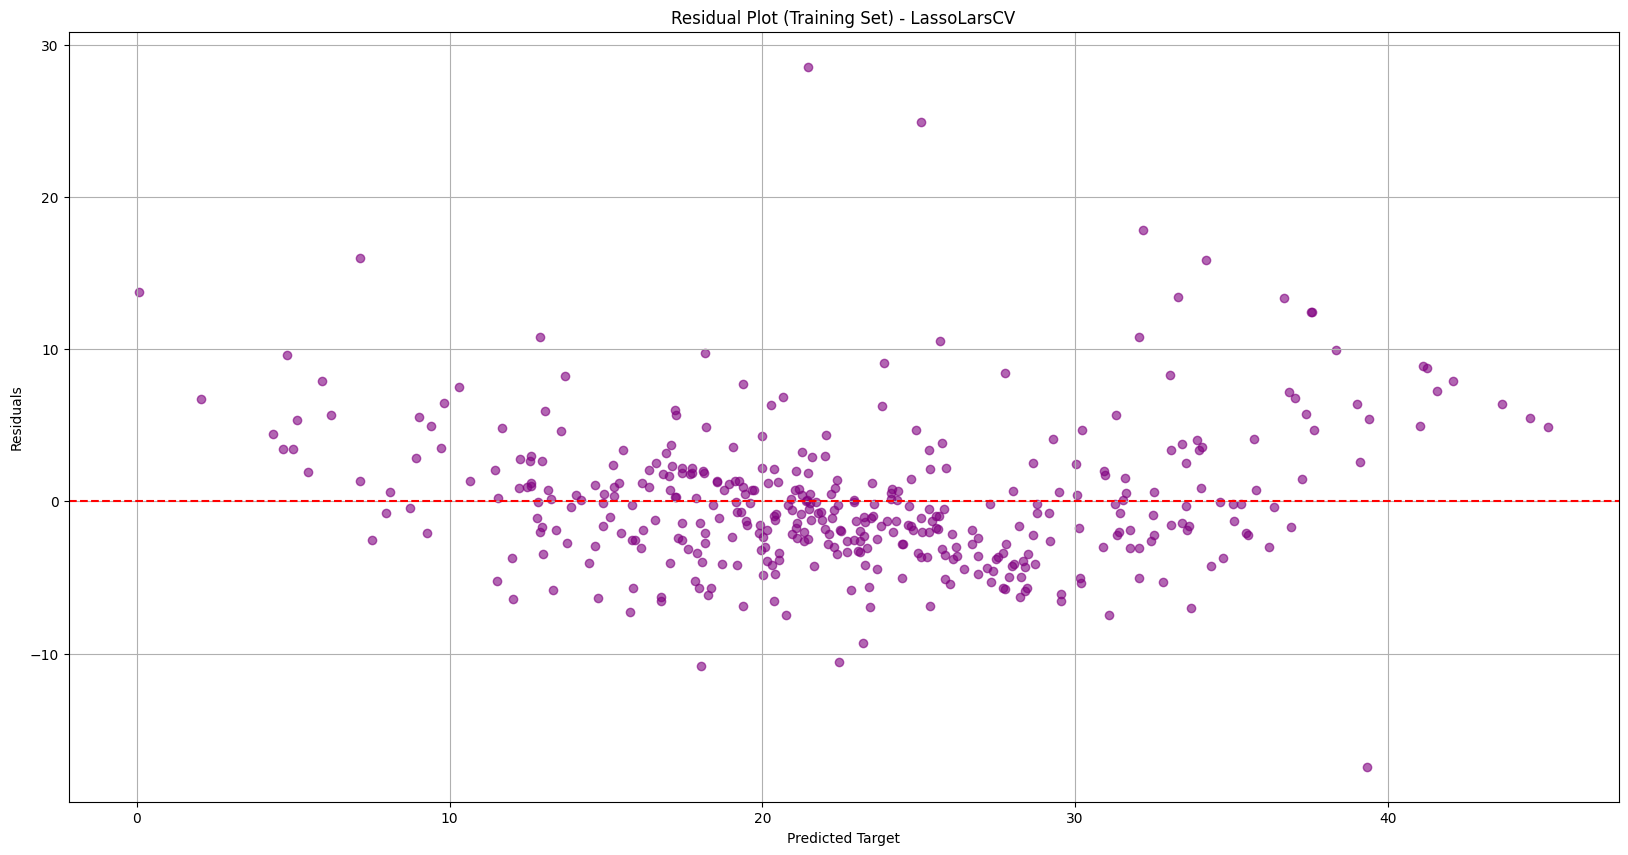

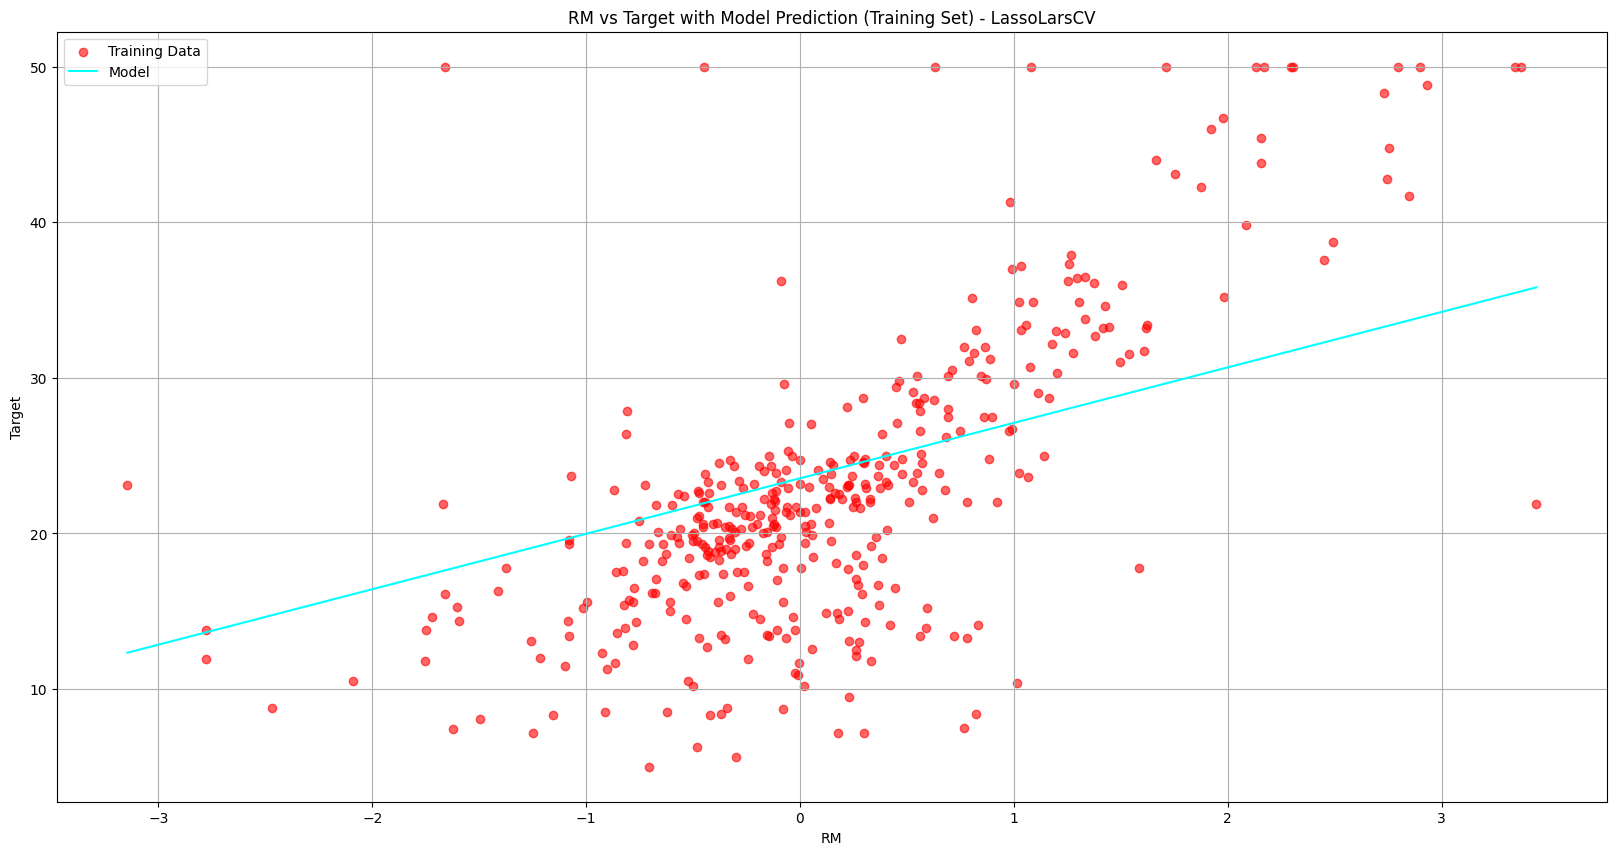

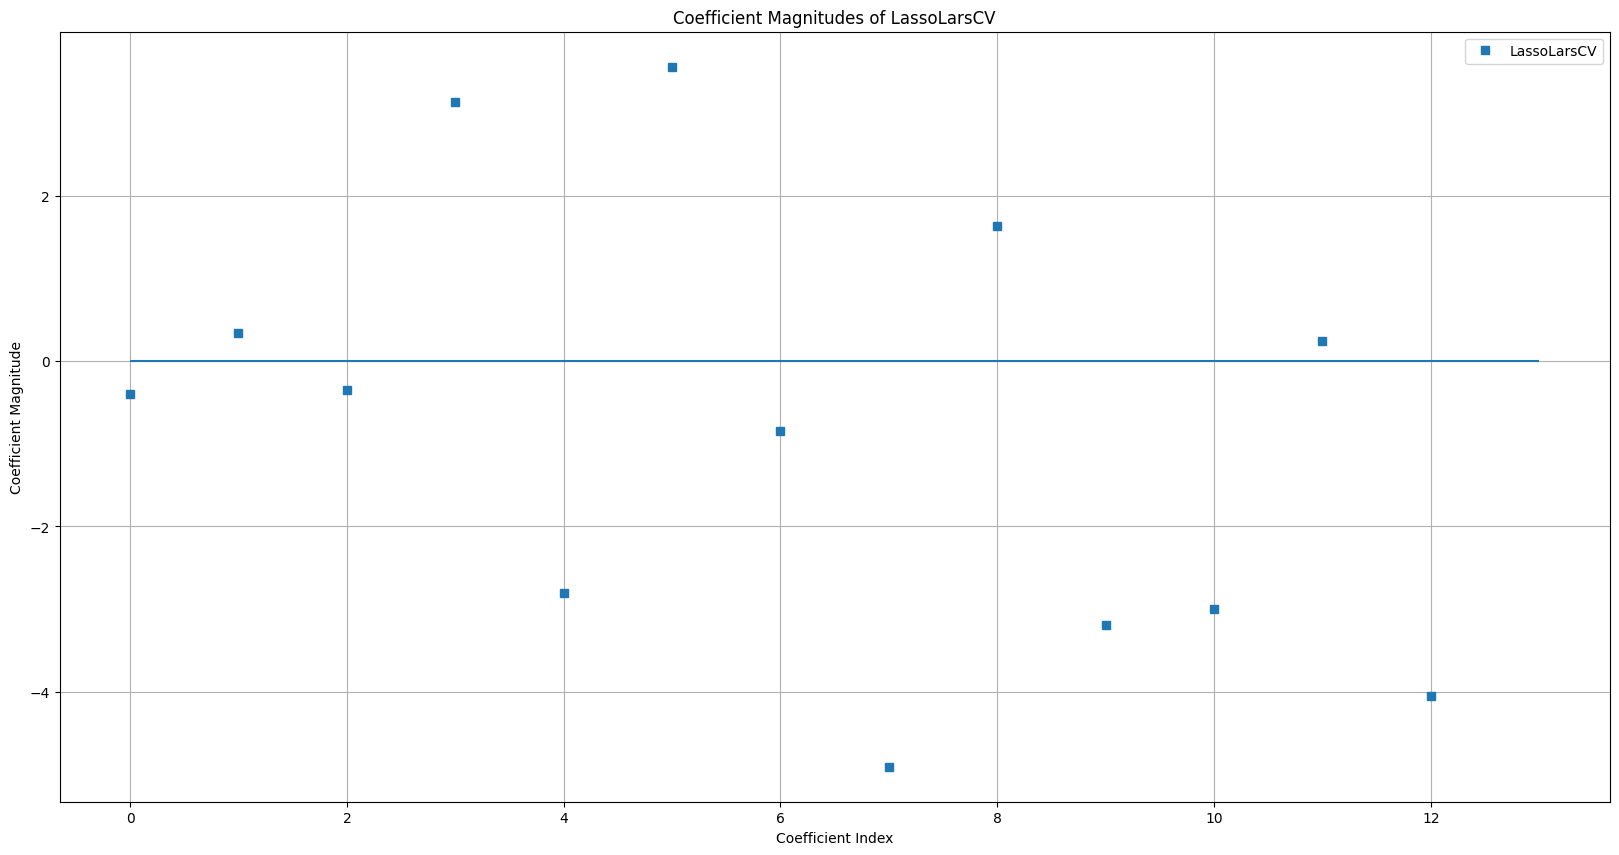


Evaluating LassoLarsIC with Best Hyperparameters...
LassoLarsIC - Training Set Metrics:
R² Score: 0.7422
Mean Absolute Error (MAE): 3.3579
Mean Squared Error (MSE): 22.4002
Root Mean Squared Error (RMSE): 4.7329



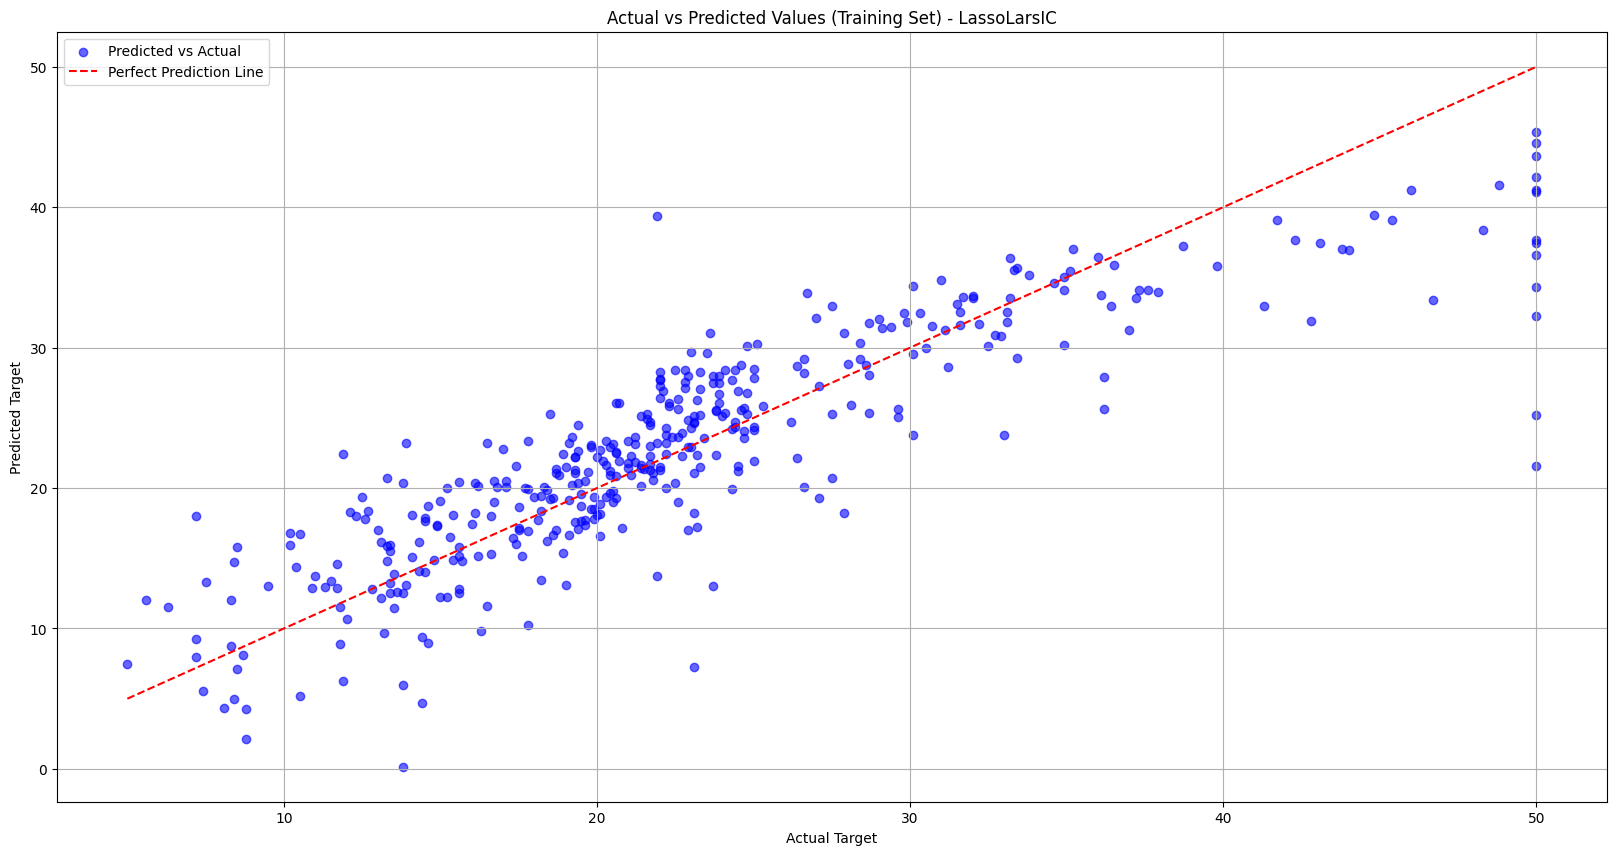

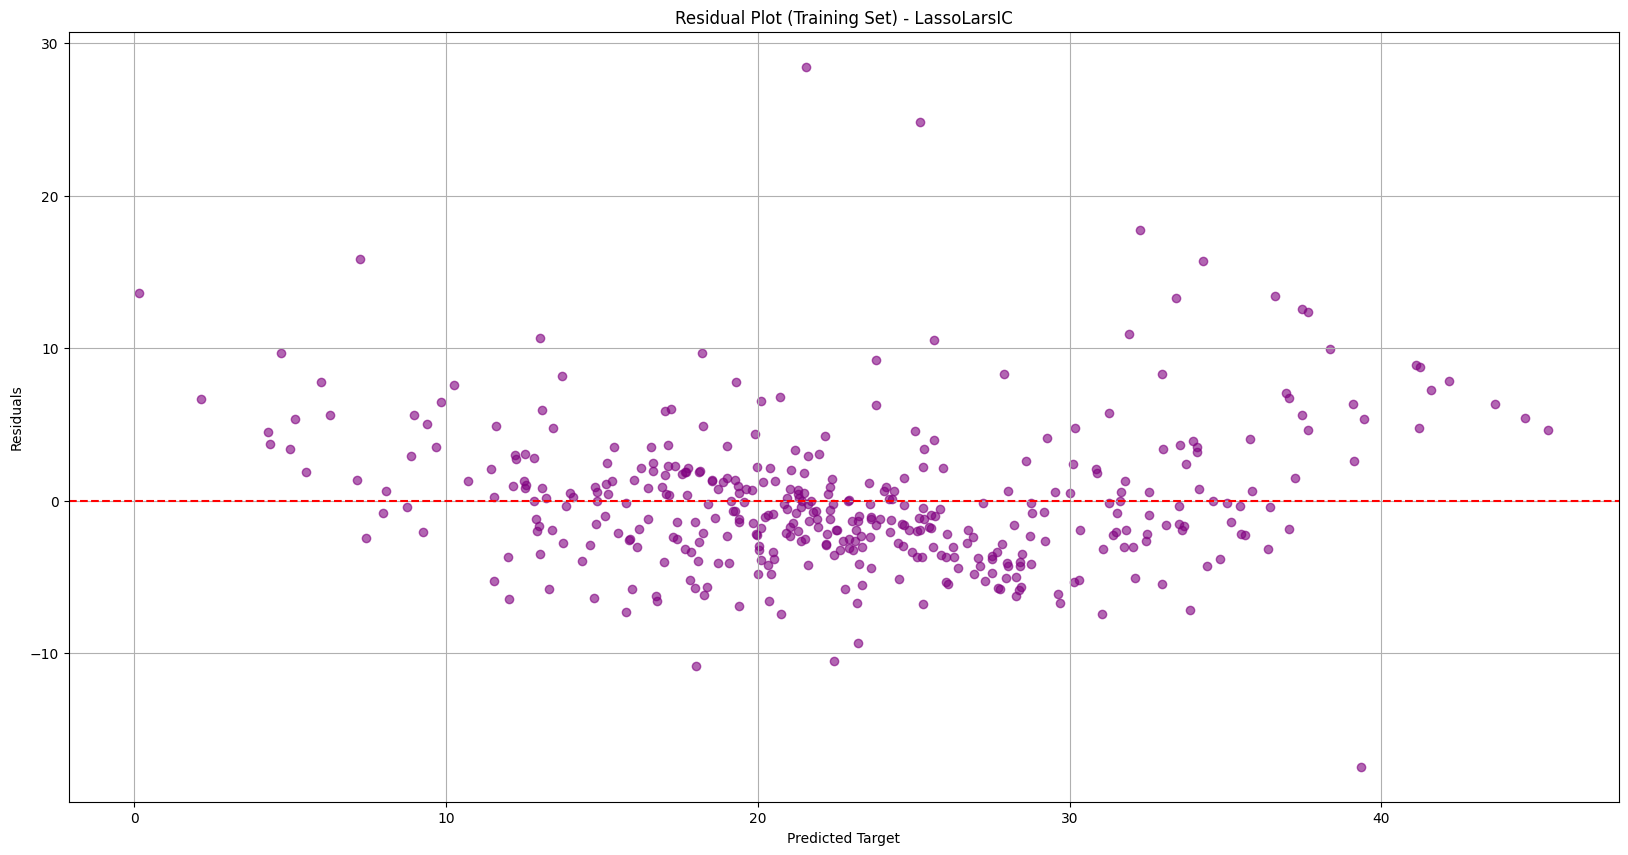

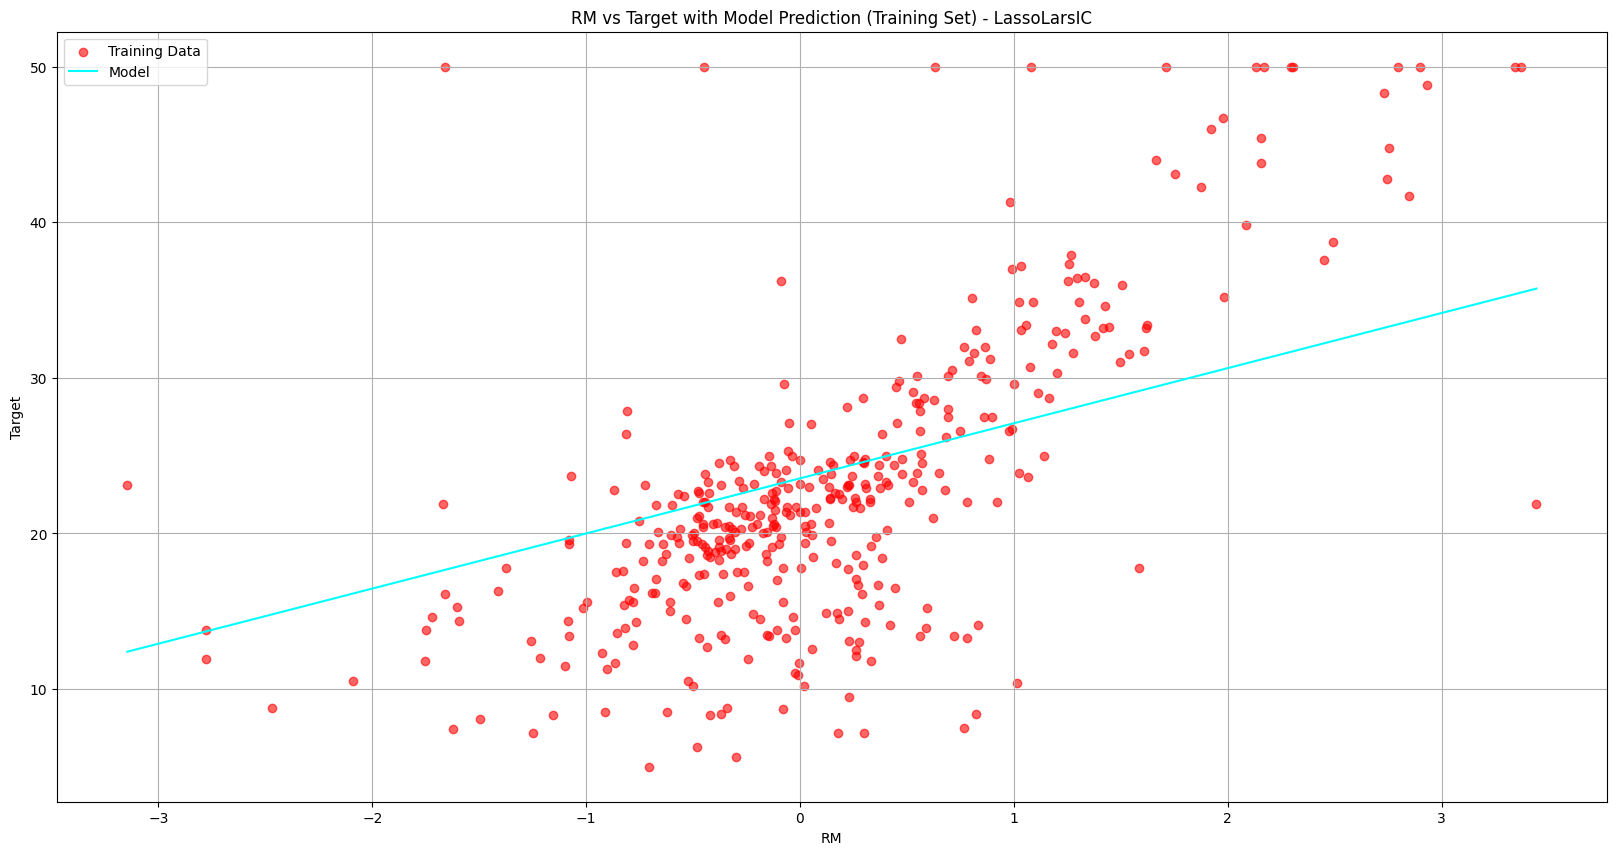

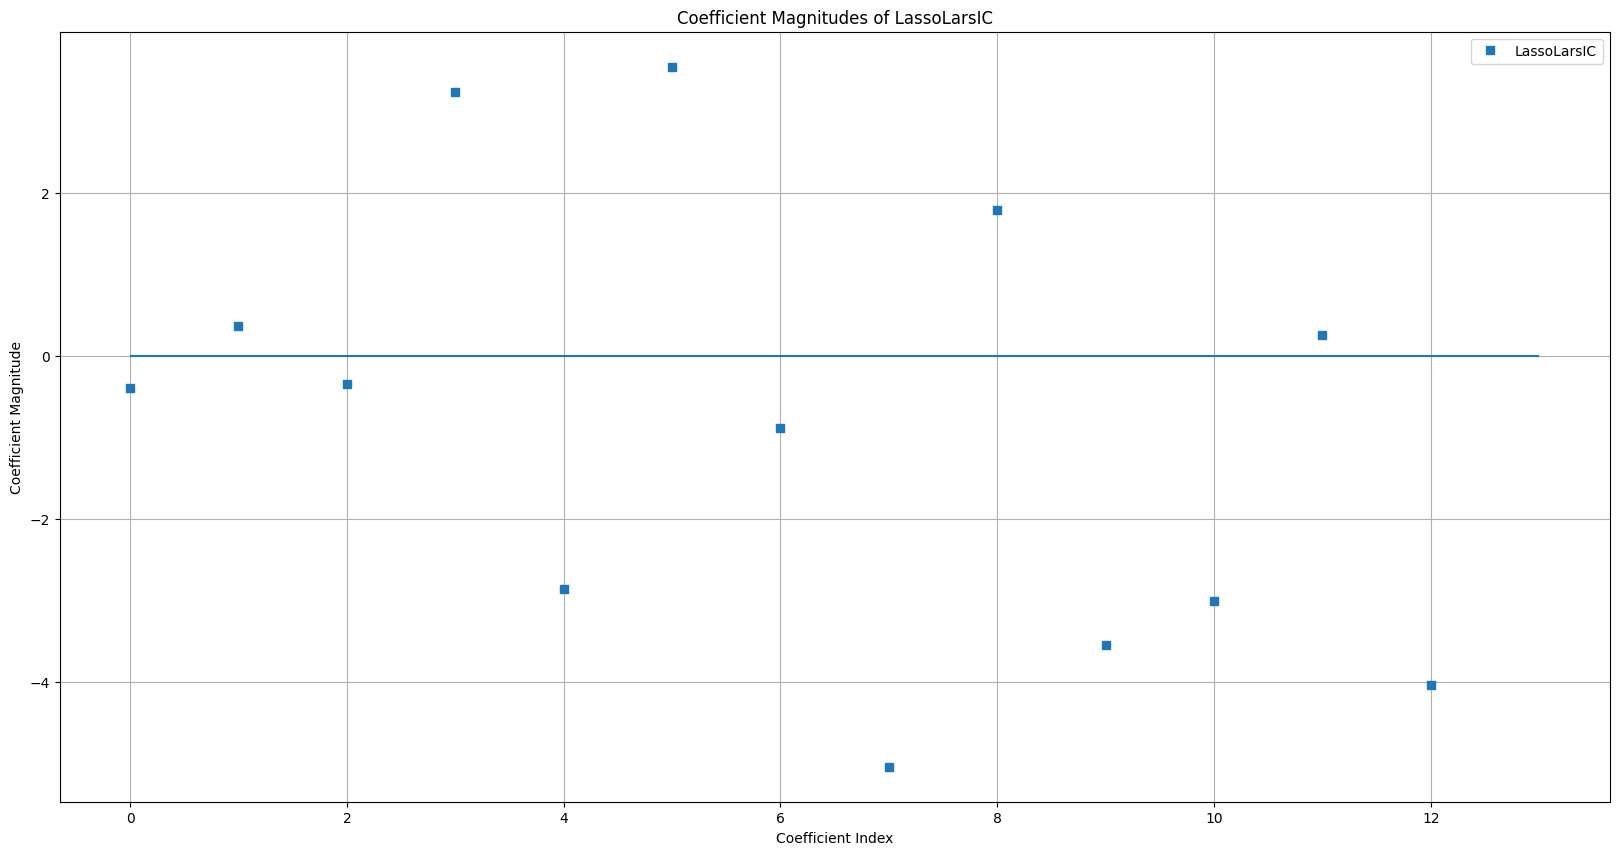

In [42]:
# Define the models with their best hyperparameters
models = {
    'LassoCV': LassoCV(
        cv=10,
        max_iter=1000,
        tol=0.001
        # Note: alphas is automatically handled by LassoCV during fitting
    ),
    'LassoLarsCV': LassoLarsCV(
        cv=10,
        eps=1e-8,
        max_iter=1000,
        max_n_alphas=100
    ),
    'LassoLarsIC': LassoLarsIC(
        criterion='aic',
        eps=1e-8,
        max_iter=1000
    )
}

# Function to evaluate the model and print metrics
def evaluate_regression(y_true, y_pred, dataset_name, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} - {dataset_name} Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")
    return r2, mae, mse, rmse

# Function to generate visualizations for a model
def generate_visualizations(model, model_name, x_train_scaled, y_train): # Removed x_test_scaled, y_test
    # Make predictions
    y_train_pred = model.predict(x_train_scaled)
    # y_test_pred = model.predict(x_test_scaled) # Removed test prediction

    # Evaluate on training set only
    evaluate_regression(y_train, y_train_pred, "Training Set", model_name)
    # evaluate_regression(y_test, y_test_pred, "Test Set", model_name) # Removed test evaluation

    # Visualization 1: Actual vs. Predicted Plot (Training Set)
    plt.figure(figsize=(20, 10))
    plt.scatter(y_train, y_train_pred, color="blue", label="Predicted vs Actual", alpha=0.6)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label="Perfect Prediction Line")
    plt.xlabel("Actual Target")
    plt.ylabel("Predicted Target")
    plt.title(f"Actual vs Predicted Values (Training Set) - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization 2: Residual Plot (Training Set)
    residuals_train = y_train - y_train_pred
    plt.figure(figsize=(20, 10))
    plt.scatter(y_train_pred, residuals_train, color="purple", alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Target")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot (Training Set) - {model_name}")
    plt.grid(True)
    plt.show()

    # Visualization 3: Feature vs. Target with Model Line (Training Set, using 'RM')
    feature_to_plot = 'RM'
    feature_idx = x_train_scaled.columns.get_loc(feature_to_plot)
    plt.figure(figsize=(20, 10))
    plt.scatter(x_train_scaled[feature_to_plot], y_train, color="red", label="Training Data", alpha=0.6)
    x_range = np.linspace(x_train_scaled[feature_to_plot].min(), x_train_scaled[feature_to_plot].max(), 100).reshape(-1, 1)
    x_full = np.zeros((100, x_train_scaled.shape[1]))
    x_full[:, feature_idx] = x_range.flatten()
    y_pred_line = model.predict(x_full)
    plt.plot(x_range, y_pred_line, color="cyan", label="Model")
    plt.xlabel(feature_to_plot)
    plt.ylabel("Target")
    plt.title(f"{feature_to_plot} vs Target with Model Prediction (Training Set) - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization 4: Coefficient Magnitude Plot (No change needed as it's model-centric)
    plt.figure(figsize=(20, 10))
    # Check if the model has a 'coef_' attribute before plotting
    if hasattr(model, 'coef_'):
        plt.plot(model.coef_, 's', label=f"{model_name}")
        plt.xlabel("Coefficient Index")
        plt.ylabel("Coefficient Magnitude")
        plt.hlines(0, 0, len(model.coef_))
        plt.title(f"Coefficient Magnitudes of {model_name}")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Warning: {model_name} does not have a 'coef_' attribute to plot coefficient magnitudes.")


# Loop through each model, train, and evaluate
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} with Best Hyperparameters...")
    model.fit(x_train_scaled, y_train)  # Train the model
    # Call generate_visualizations with only training data
    generate_visualizations(model, model_name, x_train_scaled, y_train)

# Model Evaluation

Use Lasso Regression (LassoCV) because it achieved the lowest R-square on model validation on this dataset compared with other models.


Evaluating LassoCV with Best Hyperparameters...
LassoCV - Test Set Metrics:
R² Score: 0.6564
Mean Absolute Error (MAE): 3.1646
Mean Squared Error (MSE): 25.1990
Root Mean Squared Error (RMSE): 5.0199



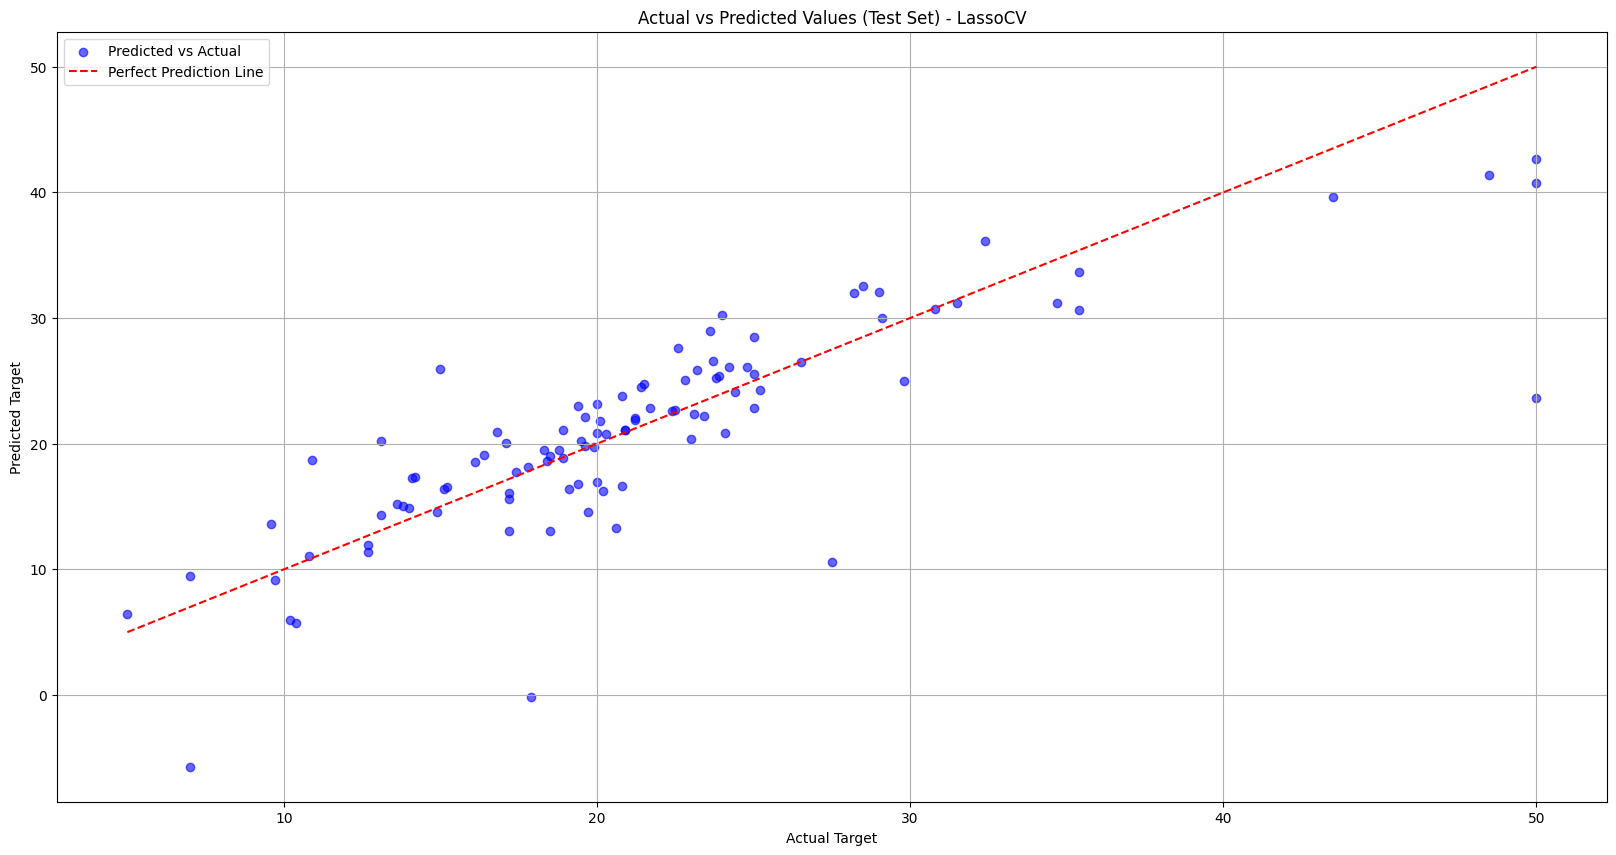

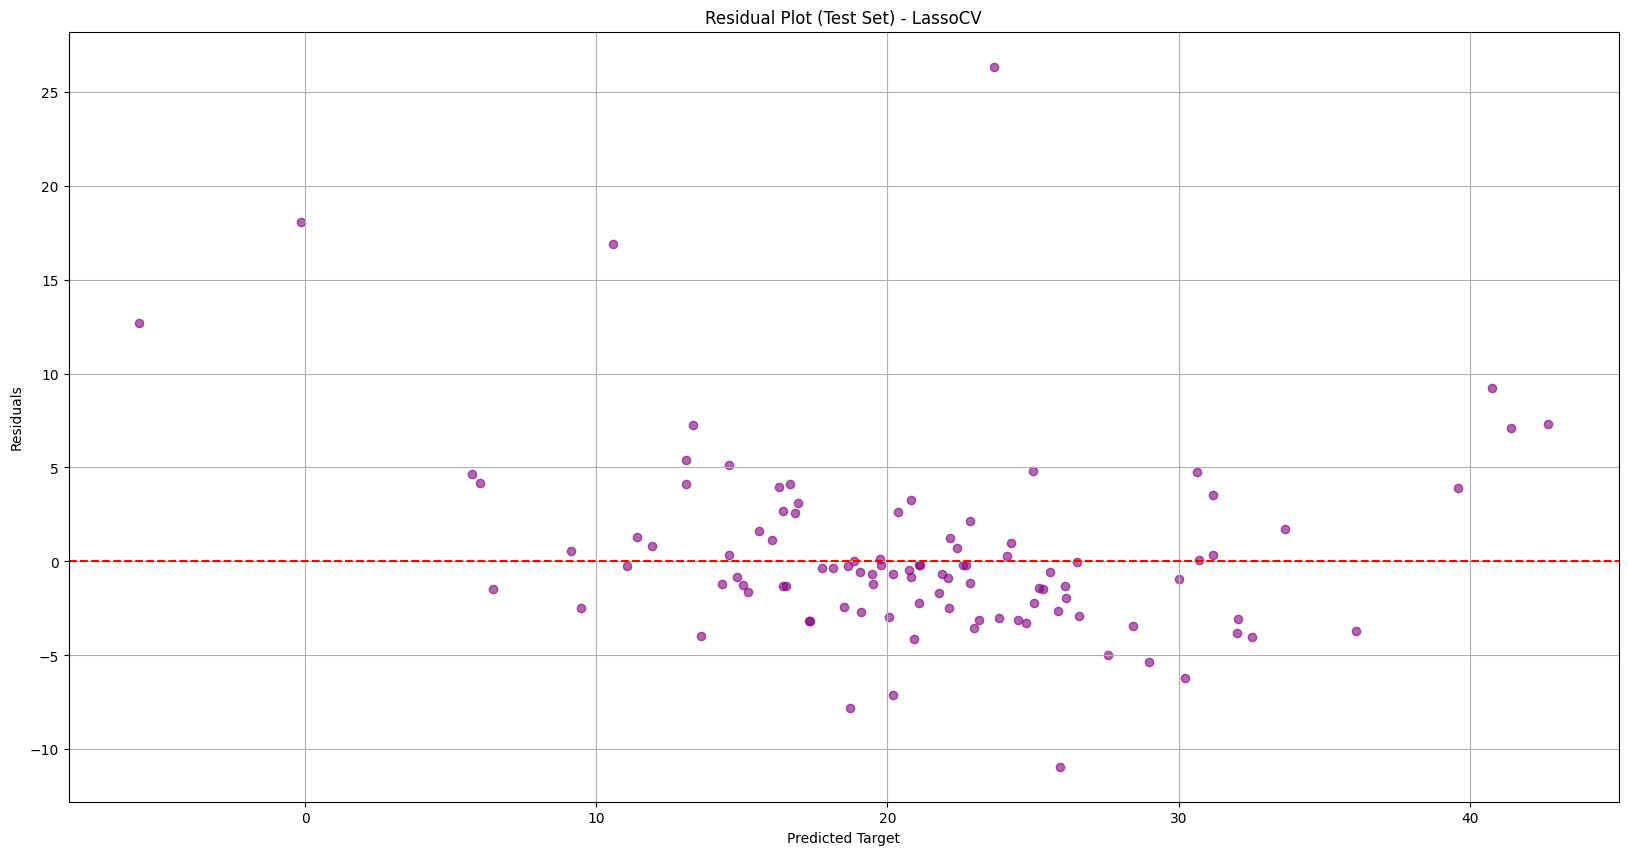

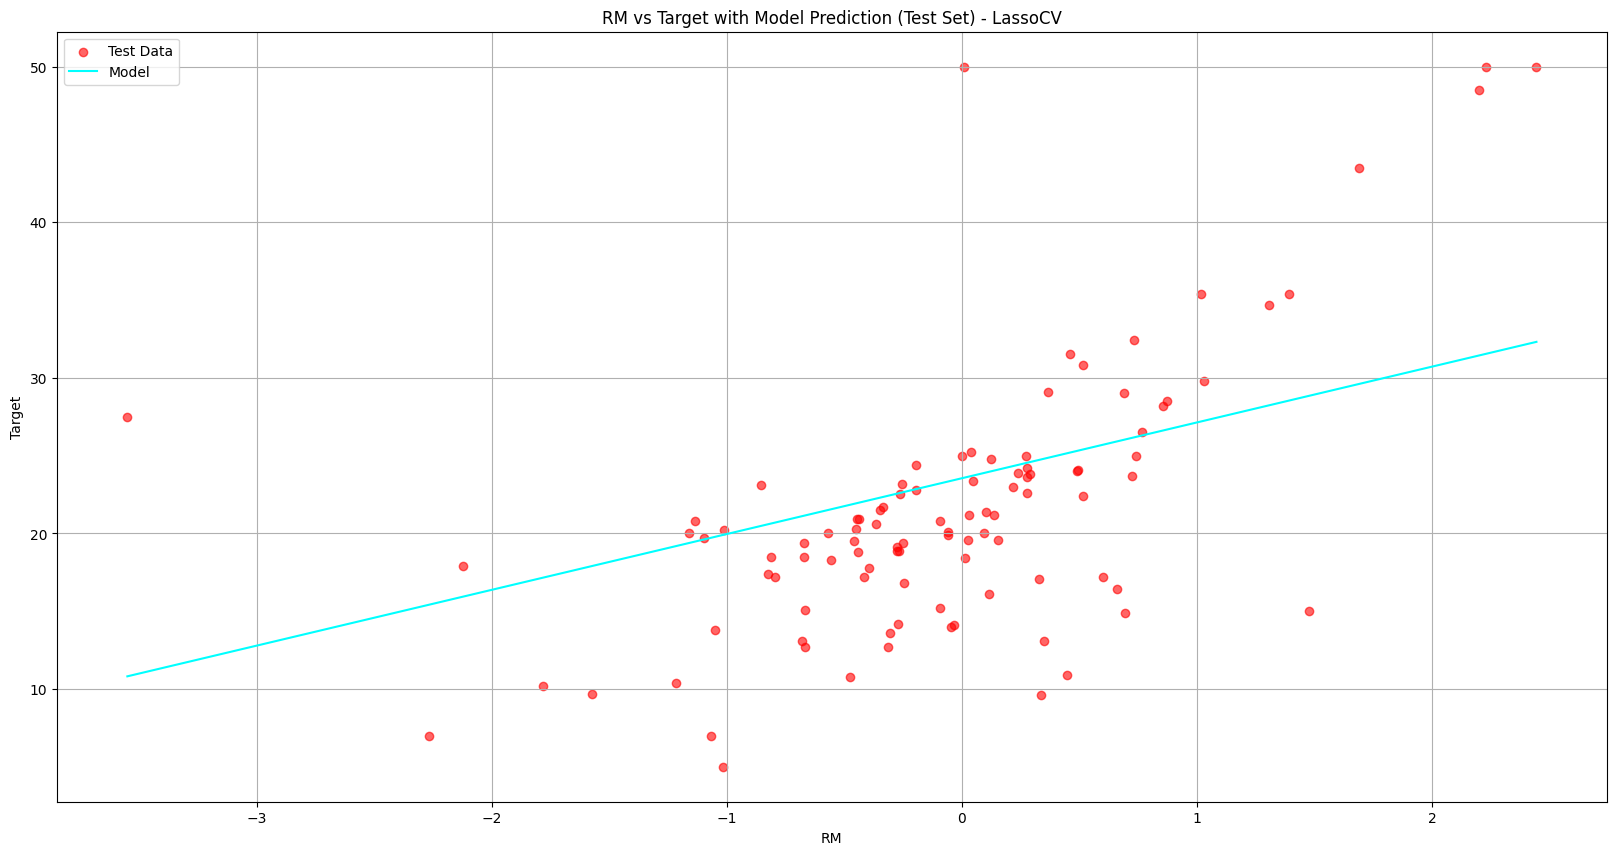

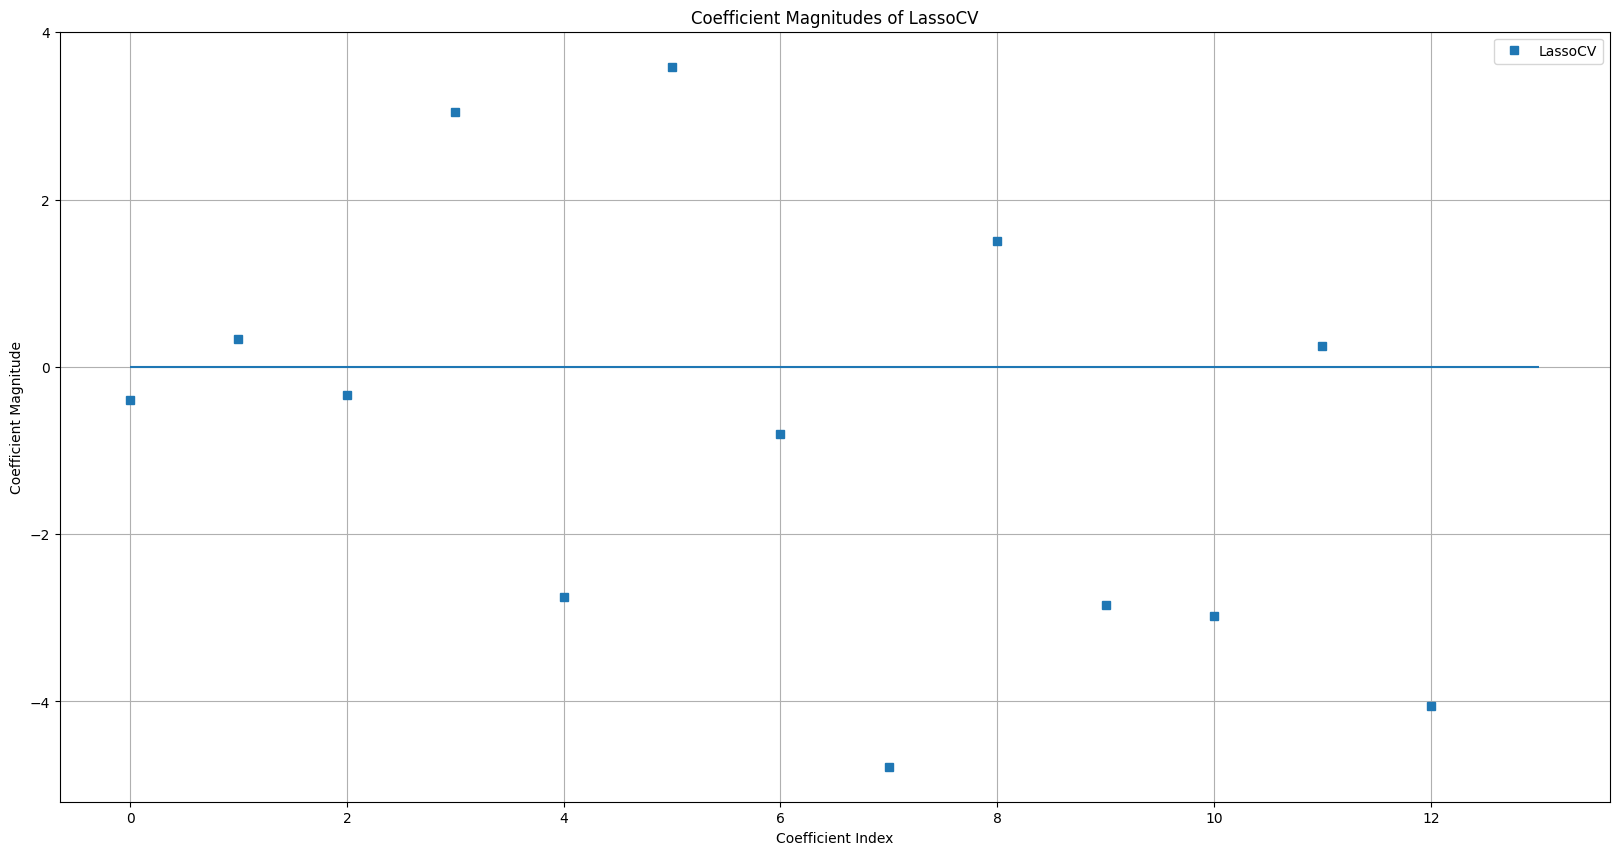

In [43]:
# Define the models with their best hyperparameters
models = {
    'LassoCV': LassoCV(
        cv=10,
        max_iter=1000,
        tol=0.001
        # Note: alphas is automatically handled by LassoCV during fitting
    )
}

# Function to evaluate the model and print metrics
def evaluate_regression(y_true, y_pred, dataset_name, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} - {dataset_name} Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")
    return r2, mae, mse, rmse

# Function to generate visualizations for a model
def generate_visualizations(model, model_name, x_test_scaled, y_test): # Changed parameters to test data
    # Make predictions on the test set
    y_test_pred = model.predict(x_test_scaled)

    # Evaluate on test set only
    evaluate_regression(y_test, y_test_pred, "Test Set", model_name)

    # Visualization 1: Actual vs. Predicted Plot (Test Set)
    plt.figure(figsize=(20, 10))
    plt.scatter(y_test, y_test_pred, color="blue", label="Predicted vs Actual", alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction Line")
    plt.xlabel("Actual Target")
    plt.ylabel("Predicted Target")
    plt.title(f"Actual vs Predicted Values (Test Set) - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization 2: Residual Plot (Test Set)
    residuals_test = y_test - y_test_pred # Calculate residuals for test set
    plt.figure(figsize=(20, 10))
    plt.scatter(y_test_pred, residuals_test, color="purple", alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predicted Target")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot (Test Set) - {model_name}")
    plt.grid(True)
    plt.show()

    # Visualization 3: Feature vs. Target with Model Line (Test Set, using 'RM')
    feature_to_plot = 'RM'
    feature_idx = x_test_scaled.columns.get_loc(feature_to_plot) # Use test data for feature range
    plt.figure(figsize=(20, 10))
    plt.scatter(x_test_scaled[feature_to_plot], y_test, color="red", label="Test Data", alpha=0.6) # Use test data
    x_range = np.linspace(x_test_scaled[feature_to_plot].min(), x_test_scaled[feature_to_plot].max(), 100).reshape(-1, 1)
    x_full = np.zeros((100, x_test_scaled.shape[1]))
    x_full[:, feature_idx] = x_range.flatten()
    y_pred_line = model.predict(x_full)
    plt.plot(x_range, y_pred_line, color="cyan", label="Model")
    plt.xlabel(feature_to_plot)
    plt.ylabel("Target")
    plt.title(f"{feature_to_plot} vs Target with Model Prediction (Test Set) - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization 4: Coefficient Magnitude Plot (No change needed as it's model-centric)
    plt.figure(figsize=(20, 10))
    # Check if the model has a 'coef_' attribute before plotting
    if hasattr(model, 'coef_'):
        plt.plot(model.coef_, 's', label=f"{model_name}")
        plt.xlabel("Coefficient Index")
        plt.ylabel("Coefficient Magnitude")
        plt.hlines(0, 0, len(model.coef_))
        plt.title(f"Coefficient Magnitudes of {model_name}")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Warning: {model_name} does not have a 'coef_' attribute to plot coefficient magnitudes.")


# Loop through each model, train, and evaluate
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} with Best Hyperparameters...")
    model.fit(x_train_scaled, y_train)  # Train the model on training data
    # Call generate_visualizations with test data
    generate_visualizations(model, model_name, x_test_scaled, y_test)